# Machine learning: exam assignment
### Predicting Marvel vs DC

#### Student: Jeroen Van Sweeveldt
##### Assignment: binary classification, predicting the creator of the respective superhero using the 'history_text' feature.
##### Part 1: data exploration and preprocessing

### 1 Data exploration
#### 1.1 Handling empty values and filtering data

In [2]:
# imports for data exploration
import numpy as np
import pandas as pd

# imports for data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# imports for data gathering
from collections import Counter

# imports for function annotation
from typing import List

print(f"NumPy == {np.__version__}")
print(f"Pandas == {pd.__version__}")
print(f"Seaborn == {sns.__version__}")

NumPy == 1.22.3
Pandas == 1.5.1
Seaborn == 0.12.0


In [3]:
# open the dataset as a comma separated values file
heroes = pd.read_csv("data/superheroes_nlp_dataset.csv",
                     encoding="UTF-8")

In [ ]:
# return 10 randomly picked data points from the dataset
# to get a general idea of what the dataset looks like

heroes.sample(10)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
908,Mohinder Suresh,Mohinder Suresh,Mohinder Suresh,-,Dr. Mohinder Suresh is a genetics professor fr...,Mohinder has acquired an ability by injecting...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
598,Hinata Hyūga,Hinata Hyūga,NaN,9,Hinata Uzumakiis a kunoichi and the former hei...,NaN,90,10,70,60,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
204,Blizzard II,Donald Gill,Donald Gill,4,Donnie Gill was working as a minor hired thug ...,The Blizzard battlesuit contains cryogenic cir...,70,10,25,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1071,Red Mist,Chris Genovese,Chris Genovese,3,The Red Mist was another teenager following th...,NaN,65,10,25,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
207,Blob (FOX),Fred Dukes,Frederick J. Dukes,6,"During the Vietnam War in mid-late 1973, Fred ...",Blob's body possesses a high degree of resista...,80,30,30,85,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
333,Curse,Phillip Krahn,Phillip Krahn,-,"The Curse, born Phillip Krahn, has been fairly...",NaN,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
727,Kefla,Kale/Caulifla,Kale/Caulifla,17,With the Potara earrings given to Caulifla and...,"According to Vados, Kefla's power consists of...",85,100,100,100,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
215,Blue Beetle (Injustice),Jaime Reyes,Jaime Reyes,10,"Jaime Reyes is the Blue Beetle, a superhero an...",With the Scarab Jaime can produce a suit of a...,75,35,90,85,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
192,Black Mamba,Tanya Sealy,Tanya Sealy,8,Tanya Sealy was born in Chicago. She was an ex...,Black Mamba possesses the ability to project ...,90,10,35,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,Ben 10,Benjamin Kirby Tennyson,Benjamin Kirby Tennyson,32,"When ten year old Ben Tennyson, his cousin Gwe...",NaN,90,100,100,100,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0


The first thing we notice from the dataset is that the entries are not limited to the Marvel and DC universes: the first entry that comes up in the random sample is Mohinder Suresh, who is a character from the series "Heroes" (which had an amazing first season), and not tied to either DC Comics nor Marvel. (Talk about my geeky background coming in handy!)

Let's see how many different creators there are actually present in the dataset, and how many features are present.

In [4]:
heroes["creator"].unique()

array(['Marvel Comics', 'DC Comics', 'George Lucas', 'Dark Horse Comics',
       nan, 'Blizzard Entertainment', 'NBC - Heroes', 'Lego', 'Wildstorm',
       'Ubisoft', 'J. R. R. Tolkien', 'Image Comics',
       'George R. R. Martin', 'Capcom', 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'Hasbro', 'Clive Barker', 'Team Epic TV',
       'South Park', 'Shueisha', 'Namco', 'HarperCollins', 'ABC Studios',
       'Universal Studios', 'Star Trek', 'J. K. Rowling', 'Konami',
       'Sony Pictures', 'Stephen King', 'Dreamworks', 'Disney',
       'Ian Fleming', 'Nintendo', 'Microsoft', 'Cartoon Network',
       'Mortal Kombat', 'IDW Publishing', 'Mattel', 'Sega',
       'Matt Groening'], dtype=object)

In [5]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              1448 non-null   object 
 1   real_name                         1301 non-null   object 
 2   full_name                         956 non-null    object 
 3   overall_score                     1450 non-null   object 
 4   history_text                      1360 non-null   object 
 5   powers_text                       1086 non-null   object 
 6   intelligence_score                1450 non-null   int64  
 7   strength_score                    1450 non-null   int64  
 8   speed_score                       1450 non-null   int64  
 9   durability_score                  1450 non-null   int64  
 10  power_score                       1450 non-null   int64  
 11  combat_score                      1450 non-null   int64  
 12  superp

In [6]:
# the dataset has 80 features
# let's narrow down the dataframe to features useful for analysis

heroes = heroes[["name",
                 "real_name",
                 "history_text",
                 "creator"]]

In [ ]:
heroes.sample(10)

,name,real_name,history_text,creator
361,Darth Maul,Maul,"Darth Maul, later known simply as Maul, was a...",George Lucas
92,Arsenal,"Roy William Harper, Jr.",NaN,DC Comics
339,Cyclops (FOX),Scott Summers,Cyclops (born Scott Summers) is a mutant with ...,Marvel Comics
1159,Sherlock Holmes,Sherlock Holmes,Details about Sherlock Holmes' life are scarce...,Dark Horse Comics
1117,Sabretooth (FOX),Victor Creed,Victor Creed was born in the mid-late 1820s in...,Marvel Comics
431,Ego (MCU),Ego,"Ego was a Celestial, a primordial and an extre...",Marvel Comics
863,Maui,Maui,NaN,Disney
425,Ebony Maw (MCU),NaN,Ebony Maw was a child of the Mad Titan Thanos ...,Marvel Comics
596,Hermione Granger,Hermione Granger,"Hermione Jean Granger (b. 19 September, 1979) ...",J. K. Rowling
1020,Power Girl,Kara Zor-L,"As originally created, Power Girl was Kara Zor...",DC Comics


In [7]:
# check "history_text" for empty values
heroes[(heroes["history_text"].isnull()) & (heroes["creator"].isin(["DC Comics", "Marvel Comics"]))]

,name,real_name,history_text,creator
14,Ace Morgan,Kyle Morgan,NaN,DC Comics
40,All-father Hercules,Hercules,NaN,Marvel Comics
72,Aqualad II,Jackson Hyde,NaN,DC Comics
92,Arsenal,"Roy William Harper, Jr.",NaN,DC Comics
111,Balder,Balder Odinson,NaN,Marvel Comics
...,...,...,...,...
1334,Trigon,NaN,NaN,DC Comics
1337,True Form Oblivion,Oblivion,NaN,Marvel Comics
1366,Venompool,Wade Wilson,NaN,Marvel Comics
1394,Weapon Hex,Laura Kinney,NaN,Marvel Comics


Google Colab's *Data Table Display* has a very nice way of interactively representing the tabular data. This functionality is unfortunately unavailable in VSCode, as far as my knowledge goes. Doing this kind of exploration through Google Colab's dynamic table formatting can make life a lot easier.

In [8]:
# add profiles to "history_text" NaN values

# of all of the ways of dealing with empty/NaN values, I opted for manually searching
# the wiki fanpages of the respective heroes and source the profile texts from there
# given that the dataset already is relatively small, this is a more desirable solution than
# dropping the empty values altogether

# first I make a copy of the dataframe to deal with the 'SettingWithCopyWarning' warning
heroes_cleaned = heroes.copy()

heroes_cleaned.loc[14, "history_text"] = "Kyle \"Ace\" Morgan is a daring pilot and a founding member of the Challengers of the Unknown. His teammates include June Robbins, Red Ryan, Rocky Davis and Prof Haley. Having cheated death once, they exist on borrowed time and have pledged to live their lives to the fullest. Their headquarters is Challengers Mountain. Ace Morgan was created by Jack Kirby, first appearing in Showcase #6."
heroes_cleaned.loc[40, "history_text"] = "In recent years, the Asgardian Enchantress hoped to gain revenge on her enemies, the Avengers. She mesmerized Hercules and set him to attack the team, but the Avenger Hawkeye managed to free him from his thrall and the Enchantress was routed. However, Hercules was exiled from Olympus by Zeus as punishment for his unauthorized excursion to Earth. The Avengers housed Hercules as their guest for months, and he often assisted them in their adventures. He was eventually made an official member of the team, but he returned to Olympus with the Avengers to rescue the other Olympians from the vengeful Typhon. Afterward, Hercules elected to remain on Olympus with Zeus' blessing. Later, the Olympian god Ares hoped to incite war among Olympus and Asgard, and eventually Earth. Ares turned all the Olympian gods to crystal, and, as Hercules was unaffected by being only half-god, Ares' agents beat him severely and abandoned him on Earth. Hercules remained amnesiac for many weeks, until he was discovered by Hawkeye and returned to the Avengers. With the Avengers' aid, the plot was uncovered, and Ares was stopped. Hercules and his teammate, the Asgardian thunder-god Thor, sealed the access to both worlds. Hercules continued to occasionally interact with Earth, as was the case with his helping found the short-lived West Coast super-team called the Champions of Los Angeles after they had helped him and Venus thwart a plot by Pluto to force him into marriage with Hippolyta and invade Olympus. While on this team, Hercules began a relationship with his team leader, the Black Widow. It did not last long, but the two remained on good terms afterward. He also kept in touch with the Avengers, assisting them in reserve capacity against menaces such as Korvac. Eventually, Hercules rejoined the Avengers on a full-time basis."
heroes_cleaned.loc[72, "history_text"] = "Aqualad came from the Atlantean city of Shayeris, where he was raised by Sha'lain'a, a native of that city, and Calvin Durham, a henchman of Black Manta who was genetically altered to infiltrate Atlantis. However, his actual father was Black Manta himself. He completed his education and began mandatory military service at age 12. At 14, he was transferred to the Conservatory of Sorcery in Poseidonis. One day, the villain Ocean-Master attacked Atlantis, causing Aquaman to battle with him. During the fight, Aquaman was defeated, but was suddenly helped by the combined forces of Kaldur'ahm and Garth. Using a combination of Garth's magic and Kaldur's fighting abilities, the two attacked Ocean-Master. Though they were easily defeated, this allowed Aquaman precious time to recover and defeat Ocean-Master. After the victory, Aquaman offered the boys the opportunity to become his protégés. Although Garth declined the offer and returned to his studies, Kaldur jumped at the chance to serve his king as his sidekick. He became a superhero two years before his tour of the Hall of Justice. He has an impressive knowledge of the people or factions he encounters and has identified many such as Guardian, Sportsmaster, the Cult of the Kobra and Professor Ivo."
heroes_cleaned.loc[92, "history_text"] = "Roy William Harper, Jr. (born July 13, 1991) is a street-savvy young man and reformed small-time criminal from the Glades. He is the son of the late Roy Harper, Sr. and an unnamed woman, the fiancé of Thea Queen, and the former sidekick/good friend of Oliver Queen. Growing up in the Glades, Roy became an ally to Oliver, who was a vigilante initially referred to as the Hood, later known as the Arrow. Prior to Slade Wilson's siege on Starling City, Roy was injected with the Mirakuru, becoming a human weapon and gaining a variety of powers, including superhuman strength, durability, and an accelerated healing factor, though it came at a cost with a slow deterioration of his mental state. He was later cured by Oliver using a counter-serum developed by S.T.A.R. Labs. Joining Team Arrow, Roy became Oliver's sidekick and vigilante partner using the codename Arsenal, also known as Speedy or the Red Arrow up until the point where Roy masqueraded as the Arrow and faked his death. Having no choice, Roy left Team Arrow and Star City to begin a new life under the alias Jason. Before leaving, Roy left his Arsenal suit to Thea, which she uses as her own vigilante persona as \"Speedy\". Roy would later return to vigilantism briefly when Noah Kuttler extorted him to steal technological components. However, he was freed from Noah's control and later relocated to another place. In 2018, Roy was found and captured by corrupt Star City Police Department officers under Ricardo Diaz's payroll, who wanted him to testify that Oliver was Green Arrow. He was rescued by Team Arrow and later left Star City along with Thea and Nyssa al Ghul in order to track down the world's remaining Lazarus Pits, returning to vigilantism once again. Ultimately, Roy's name (regarding his status as a vigilante) was cleared when Oliver publicly confessed to being Green Arrow. During Roy's mission, he was fatally injured in a battle against the Thanatos Guild and had to be healed in a Lazarus Pit. As a side effect of his previous exposure to the Mirakuru, he gained a bloodlust that couldn't be cured by the Lotus elixir. In an erased future, Roy self-exiled himself to Lian Yu to atone for the death of two innocent men he killed during a bloodlust episode. In 2040, he returned to Star City with William Clayton to assist the Canaries. On Earth-Prime, after the Crisis ended, Roy attended Oliver's funeral. He proposed to Thea and was ready to start a life with her, which she happily accepted on the condition he would never leave like he did again."
heroes_cleaned.loc[111, "history_text"] = "Balder allied with a resisting pocket of superhumans, killing many of the Avengers in the name of Asgard's reign over the world, murdering Scarlet Witch and Thor's former lover Jane Foster."
heroes_cleaned.loc[126, "history_text"] = "Barbara Gordon is the Gotham City vigilante known as Batgirl and elite computer hacker known as Oracle. She is the daughter of Commissioner James Gordon and Barbara Eileen Gordon and the older sister of James Gordon, Jr.."
heroes_cleaned.loc[127, "history_text"] = "Stephanie Brown is the vigilante Batgirl, forming one half of the Batgirls with Cassandra Cain. Daughter of the villain Cluemaster, she fought criminals like her father as Spoiler, before a brief stint as Batman's crime-fighting partner Robin. She is a member of the Batman Family and Young Justice."
heroes_cleaned.loc[128, "history_text"] = "Batgirl is one of Batman's side-kicks and a member of the Batman Family similar to Robin. There have been several women to take the position over the years. The original Batgirl during the Silver Age was Bette Kane. This was later removed from continuity, and the character was reintroduced under the alias Flamebird. The most well-recognized Batgirl is Barbara Gordon, daughter of Commissioner Gordon, and the original in modern continuity. She was Batgirl for many years until the Joker shot her through the spine during the events of The Killing Joke and paralyzed her. Barbara still fought crime from her wheel-chair as Oracle, an international super-hacker and invaluable computers expert for heroes everywhere. Cassandra Cain, daughter of the assassin David Cain, became the next Batgirl while seeking redemption for her father's crimes. She was eventually manipulated into going rogue by Deathstroke and gave up the cowl after she had recovered from her mental breakdown. The teleporter Misfit briefly called herself Batgirl when she started her vigilante career on the streets, although she changed her name after she was taken in by the Birds of Prey. Stephanie Brown, originally known as Spoiler and a former Robin, became Batgirl after the apparent death of Batman. Gordon has since returned to the position in the DCnU following a recovery."
heroes_cleaned.loc[148, "history_text"] = "As a member of the first class of X-Men, the intelligently gifted Dr. Hank McCoy has been fighting for the peaceful coexistence between mutants and humans for most of his life, under the tutelage of Professor Xavier. Born with an enhanced physique, strength, and muscular structure, he has adopted by the name Beast. McCoy's mutation further developed when he worked at the Brand Corporation and developed a serum that triggered his transformation into a blue-furred creature with sharp fangs and claws. As a cheerful and bouncing super hero, Beast established a renowned reputation as an Avenger, a Defender, and a member of X-Factor. Having found himself back to the X-Men and the Xavier Institute, Beast was one of the most engaged X-Men in carrying on Xavier's dream. However, under the leadership of his longtime teammate Cyclops, the X-Men turned to extremism, leading Beast to defect. His opposition escalated with the schism between Cyclops and Wolverine, for he joined the latter in building the Jean Grey School for Higher Learning. The war between the Avengers and the X-Men consolidated Beast's allegiances, as he supported the Avengers and focused on opposing Cyclops' operations in any possible way. Additionally, he also assumed Professor Xavier's legacy in the shadowy organization known as the Illuminati. Mutantkind has been reunited by Professor Xavier on the mutant nation of Krakoa. Beast was a central part in planting the first seeds of the Krakoan civilization. In order to deal with external threats to the mutant nation, Beast has taken a position as the chief of the intelligence agency X-Force. This has costed him his morality, as he descended to questionably authoritarian actions to guarantee the Krakoan sovereignty."
heroes_cleaned.loc[194, "history_text"] = "The boy who would become Black Manta was an autistic youth who grew up in Baltimore, Maryland, and loved to play by the sea. As a youth he was kidnapped and forced to work on a ship for an unspecified amount of time. At one point he apparently saw Aquaman with his dolphin friends and tried to signal him for help but was not seen. Finally, he was forced to defend himself, killing one of his tormentors on the ship with a knife. Hating the emotionless sea (and Aquaman, who he saw as its representative), the boy was determined to become its master. Placed into an institution for his mental \"affliction,\" the boy was treated cruelly by his attendants. The boy experienced being immersed in water as sublime ecstasy, while the softness of the cotton sheets of his bed bore for him excruciating pain. The attendants would strap him to the bed anyway, and to stifle his screams of pain, they would smother him with pillows until he passed out. The boy could barely speak, usually repeating a few words, such as \"love swim.\" The doctors began performing experimental treatments on the boy, experiments that seemed to cause him pain. One of these experiments was successful enough that he became able to speak in complete sentences. Using his newfound ability to seem normal, the boy put his doctor at ease enough to unstrap him. Afterward, the boy used the syringe used to help him speak to murder the doctor and escape. As an adult, he designed a costume (primarily a black wetsuit with bug-eyed helmet that was able to shoot blasting rays from its eyes) and fashioned a high-tech submersible inspired by black manta rays. Taking the name Black Manta, he and his masked army became a force to be reckoned with. He also joined the short-lived Injustice League."
heroes_cleaned.loc[253, "history_text"] = "Steve Rogers was born July 4, 1922, to poor Irish immigrant parents, Sarah and Joseph Rogers. Rogers grew up a frail youth during the Great Depression in New York City, New York. Little else is known about Rogers' early life other than the fact that a strong sense of duty, honor, and humility was instilled in him; perhaps due to his Irish Catholic upbringing. Rogers' father died when he was a child and his mother died from pneumonia later, when he was in his late teens. Steve used to go to a school in the Lower East Side neighborhood. Among the people responsible for instilling the patriotic values in him were his civics teacher Edna Crosley, who taught that as an American it was their responsibility to protect the United States which gave more rights than any other country in the world to its citizens. Horrified by newsreel footage of Nazis ransacking Europe and atrocities in Asia that the Empire of Japan committed in China and Korea, Rogers tried to enlist in the Army but was rejected as 4-F because of his frailty and sickness. Overhearing the boy's earnest plea to fight for his country, General Chester Phillips, of the US Army, offered Rogers the opportunity to take part in a top-secret performance-enhancing experiment called Operation Rebirth. Rogers agreed and was taken to a secret laboratory in Washington, D.C., where he was introduced to Doctor Abraham Erskine (code named Professor Joseph Reinstein), the creator of the Super-Soldier Serum. After weeks of tests, Rogers was at last administered the Super-Soldier Serum. Given part of the compound intravenously and another part orally, Rogers was then bombarded by vita-rays, a special combination of exotic (in 1941) wavelengths of radiation designed to accelerate and stabilize the serum's effect on his body. Steve Rogers emerged from the vita-ray chamber with a perfect human body. A Nazi spy, who observed the experiment, murdered Dr. Erskine mere minutes after its conclusion. Dr. Erskine died without fully committing the Super-Soldier formula to paper, leaving Rogers the sole beneficiary of his genius. Rogers was then put through an intensive physical and tactical training program that taught him gymnastics, hand-to-hand combat from Colonel Rex Applegate and William Essart Fairbairn, and military strategy. During the war, \"Cap\" served as both a symbol of freedom and America's most effective special operative. In addition to working with his young sidekick Bucky, Cap regularly fought alongside other Allied super-powered heroes such as Namor the Sub-Mariner and the android Human Torch, who were the recognized core of the World War II super-team known as the Invaders - a name suggested by English premier Winston Churchill. Rogers sometimes came into contact with a Canadian paratrooper named James Howlett, the man who would come to be legendarily known as Wolverine. During the final days of the war, presumably on or before April 18, 1945, Captain America and Bucky were trying to stop a bomb-loaded drone-plane, launched by Baron Zemo, when the plane exploded, apparently killing his partner Bucky and throwing Rogers into icy Arctic waters of the English Channel. The Super-Soldier Formula prevented crystallization of Rogers' bodily fluid, allowing him to enter a state of suspended animation. Although Rogers and Bucky had seemingly perished, the war still raged on and U.S. presidents and the government picked different volunteers, such as William Naslund, Jeffrey Mace, and another Steve Rogers, over the years, to keep the morale alive, and even after World War II ended. Decades later, Rogers' wartime comrade, the Sub-Mariner, stumbled across his still-frozen form, which was being worshiped by a far-flung Inuit tribe. Enraged, the Sub-Mariner threw the ice block into the ocean. While opposing Namor, the newly formed Avengers happened upon Rogers' thawing body and soon revived the legendary hero. Rogers joined their ranks as the first recruit, since their formation, and was given retroactive \"founding member\" status in place of Hulk. With his superhuman abilities, extensive training, combat experience, combined with his impressive physique, confidence, and will, Rogers was an excellent addition to the team. As a born leader, Rogers would come to be seen as the heart and soul of the team and his commands, while in the field, were often followed regardless of who might have been team leader at the time. Rogers would teach teamwork, tactics, and hand-to-hand combat to many Avengers over the coming years."
heroes_cleaned.loc[256, "history_text"] = "Nathaniel Adam was a United States Air Force officer during the Vietnam War era. He was framed for a crime he didn't commit and sentenced to death under the watch of Col. Wade Eiling in 1968. To avoid execution, he was invited to participate in a military experiment with little chance of survival, with the promise of a presidential pardon should he survive. The experiment involved testing the hull of a crashed alien ship's durability by exploding a super nuclear bomb under it while Adam was in the ship. Against the odds, Adam survived, the alien metal melding with his body, while the excess energy threw him forward in time nearly twenty years. Regaining coherence in 1986, Adam found himself a man out of his time and back in the hands of Eiling, now a general and the second husband of Adam's now-deceased wife. Everyone had assumed Adam had died during the experiment, so his presidential pardon was never issued and the current government refused to acknowledge the previous administration's promise. Seizing the opportunity at hand, the government used the outstanding murder/treason charges against Adam to blackmail him into being a government-controlled superhero codenamed Captain Atom. The government gave him a false origin for use in public and assigned him the alias of Cameron Scott, an Air Force intelligence operative. It was during this time he met the superpowered terrorist Plastique, who would become a recurring part of Adam's life. As Captain Atom, Adam served under Eiling reluctantly until he succeeded in clearing his name. Eventually, Atom rebelled against Eiling, resigned from the Air Force and found some fulfilment as an actual superhero. Captain Atom joined the Justice League at the request of the U.S. government, eventually serving as leader of Justice League Europe."
heroes_cleaned.loc[275, "history_text"] = "Catwoman is Selina Kyle, a morally ambiguous character who has been an antihero, acting as an adversary, a crimefighter and also a love interest for the Batman. Years of training have made her stealthy and agile as a world-class criminal, and her mastery of martial arts makes her a formidable physical opponent. Although she began her career as a burglar, she has since then reformed and begun protecting Gotham City in her own style. This has led to her being almost completely accepted as a regular member of the Batman Family. She has also been a member of the Birds of Prey, the Outsiders, the Gotham City Sirens, the Injustice League, the Justice League and the Secret Society of Super-Villains. Her close friend Holly Robinson also acted as her successor for an extended period when Selina was out of commission."
heroes_cleaned.loc[299, "history_text"] = "Nathan Heywood is a grandson of Henry Heywood and a cousin of Henry Heywood III. Formerly a football star, Nathan retired after shattering his kneecap and having his leg amputated. The incident left Nathan addicted to painkillers. While attending a Heywood family reunion, Nathan was attacked by the Fourth Reich, a team of metahuman Neo-Nazis ordered to wipe out the bloodlines of Golden Age heroes by Vandal Savage. Despite the Fourth Reich's effort, they failed to completely destroy the Heywood bloodline, as Nathan and a few children managed to survive. Both Nathan's brother and mother were turned to metal statues by the villain Reichsmark. Nathan jammed his crutch into Reichsmark's mouth, causing him to spit liquid metal blood onto Nathan. Hawkman took him to Doctor Mid-Nite, who noted that the metal was being absorbed by Nathan's skin. It was later revealed that the metal had grown out from the amputation scars on Nathan's leg, replacing the lost limb. The new leg was constructed of metallic analogues of bone, muscles, and flesh. Waking in his hospital room, Nathan was shown to have superhuman strength. Doctor Mid-Nite informed Nathan that he was now a being of living steel, due to an unknown reaction to Reichsmark's blood. He was christened Citizen Steel by Power Girl."
heroes_cleaned.loc[324, "history_text"] = "Cosmic King Thor, also known as the Thor of the Asgardian Apocalypse, is a version of Thor that possesses different abilities than the normal Thor. The most notable difference is that Cosmic King Thor possesses the power of the Odinforce, which is a cosmic energy that grants him immense strength, durability, and the ability to manipulate reality. He also possesses the ability to fly and has near-invulnerability. Additionally, Cosmic King Thor wields the powerful Asgardian weapon known as the War Thor's Hammer, which grants him the ability to summon lightning and storms."
heroes_cleaned.loc[329, "history_text"] = "Young Brock Rumlow led the Savage Crims gang on New York's lower east side. After he brutalized fifteen year old Rachel Leighton, two of her brothers assaulted Brock and he killed them. Rumlow fled, entering the Taskmaster's school for criminals, and within three years he became an instructor there under the name Bingo Brock. As a mercenary, he enlisted with the communist Red Skull (Albert Malik) in Algeria, serving him as \"Frag\" until he was sent to invade Arnim Zola's Switzerland chateau. Ultimately the only team member to survive the assault, Rumlow met and impressed the Nazi Red Skull (Johann Schmidt), who accepted Brock’s services, codenaming him \"Crossbones\"."
heroes_cleaned.loc[352, "history_text"] = "Matthew Michael \"Matt\" Murdock is a lawyer who was blinded as a young boy by a radioactive substance that fell into his eyes from a crashed vehicle. Even though he lost his sight, his other four remaining senses were heightened to superhuman levels. After mobsters killed his father, Murdock was trained by Stick to become a warrior, using his disability as an advantage to fight for the Chaste. However, Murdock's compassion for Elektra led him to be rejected by Stick. He then returned to Columbia University with Foggy Nelson to gain his law degree. Murdock dedicated his life to fighting injustice where he could find it in New York City; by day, as a lawyer with his law firm Nelson and Murdock, and by night, as a vigilante known as the Masked Man. Murdock's actions as a crime fighter eventually put him into conflict with Wilson Fisk. Murdock used his skills to expose Fisk's criminal activities and then had him arrested, with Murdock now being known as Daredevil."
heroes_cleaned.loc[357, "history_text"] = "Dark Phoenix is the name given to Jean Grey after she became corrupted by the Hellfire Club and turned into a vastly powerful supervillain who proceeded to cause chaos across the universe until being defeated in a battle that supposedly claimed her life (of course Jean Grey was later revealed alive) - although modern retelling attribute much of the events to the corruption of the Phoenix-Force in the original comic book (and X-Men 3) the Dark-Phoenix was simply Jean Grey gone bad rather than a separate/merged entity."
heroes_cleaned.loc[403, "history_text"] = "Dr. Otto Octavius is a highly intelligent and prideful scientist, better known as the criminal mastermind Doctor Octopus. During an atomic research project, Octavius' body was fused to four mechanical, tentacle-like arms, also causing him severe brain damage that turned him into a criminal. He clashed with Spider-Man and went to become one of his greatest enemies. After multiple battles, Otto's body started to fail and decay itself.[26] In one last attempt to survive, Otto swapped brains with his nemesis, leaving Spider-Man to die in his fragile body. However, residual memories caused Otto to understand the responsibility of being a hero and strove to become the Superior Spider-Man, a better crime-fighter than his nemesis ever was. Despite his best efforts, Otto's ruthless method of justice was futile in stopping the return of Green Goblin, forcing Otto to cede control of his body back to Peter Parker, understanding him to be the one worthy of being called Spider-Man. A digital backup of Otto's mind survived and housed himself in the robotic body of the Living Brain. Using the cloning technology of the new Jackal at his disposal, Otto transferred his digital mind to a new body made from his and Spider-Man's genes, assuming the alias of the Superior Octopus while working with Hydra. Creating the identity of \"Elliot Tolliver,\" Otto moved to San Francisco, where he resumed his activities as the Superior Spider-Man. Despite all the good he had done, Otto was forced to make a deal with Mephisto to return to his Doctor Octopus body and mind to defeat another criminal mastermind. However Otto slowly started to spiral into depression over the loss of information that helped him find what he called \"The Great Equation\", a culmination of all his life's work. Otto grew miserable and redirected this frustration towards the now-reformed Norman Osborn for being responsible for dismantling the heroic life he made during Otto's first time as the Superior Spider-Man and possibly for his alternate reality counterpart putting Otto in a position where he had to once again relinquish his desire to be a hero and become his original villainous self. Realizing that the only way for him to be at peace is to regain his lost memories, Otto sets out to once again become the Superior Spider-Man."
heroes_cleaned.loc[489, "history_text"] = "Flash Thompson is a bully-turned selfless-soldier better known as Agent Anti-Venom. Initially the high school tormentor of Peter Parker, whose secret alter-ego of the super hero Spider-Man also happened to be Flash's biggest idol, Thompson grew out of his abusive behavior and befriended Peter in college. Flash joined the Army and was stationed in Southeast Asia, but had trouble finding a place to fit when he returned to the States. Flash spiralled into depression and combated alcoholism, an addiction that was exploited by the villainous Norman Osborn to involve him in a car crash. This left Flash in a near-vegetative state after waking up from a coma. Flash eventually regained his full faculties, and became a gym teacher at his old school. Thompson returned to service and earned a Medal of Honor, although for the same mission that cost him his legs. Becoming bonded to the Venom symbiote, Flash served as Agent Venom for Project Rebirth 2.0. He struck out on his own after it was shut down and also joined the Secret Avengers. After returning to Earth following a stint in space with the Guardians of the Galaxy, Flash lost the symbiote. He ultimately gained a new symbiotic companion and became Agent Anti-Venom. Dying at the hands of the Red Goblin, Flash's consciousness survived in the Symbiote Hive-Mind, and his body was later resurrected, returning him to fighting form as Agent Anti-Venom."
heroes_cleaned.loc[520, "history_text"] = "Gizmo is one of the founding members of the Fearsome Five, enemies of the Teen Titans. A brilliant midget weapons maker who has the incredible ability to convert anything into machinery which can perform almost endless varieties of tasks."
heroes_cleaned.loc[546, "history_text"] = "As a child, Norman Osborn became obsessed with gaining wealth and power. His father, a failed business inventor who claimed that he was swindled out of his inventions and personal fortune, took out his rage on Norman. Norman would not allow himself to become a failure like his father, he realized that he could not depend on him for financial security, thus began working after school. Norman studied chemistry and electrical engineering at Empire State University, and also took a number of courses in business administration. However, he had a cheating apparatus which was reported by one of his friends, Ned Tobolowski, causing him to lose his scholarship and nearly getting expelled. One of his teachers was Professor Mendel Stromm. They became good friends and later formed a business partnership. Since Norman put up the bulk of the financing, they called their company Osborn Chemical, a.k.a. Oscorp. He married his college sweetheart; Emily Lyman and they had a son Harold \"Harry\" Osborn. Unfortunately, his wife became ill. After she seemingly died, he buried himself in his work and rarely had time for young Harry. When he was about to go bankrupt on account of his debts and would eventually have his company taken over by his partner, Mephisto approached him in the guise of an \"acquisitions\" investor and offered Norman a deal to make his financial life more successful in exchange for his son's soul. Norman initially refused the deal, but after the devil explained to him that if he accepted, he would not even remember their encounter, he agreed. With the deal closed, Mephisto made Norman's business life immensely successful both financially and in status but made him relentless in the process - ultimately leading to his madness. This reality-warping deal greatly affected Norman's life, not only as his soul was corrupted that he became so obsessed with wealth and power, but it also affected his son, that would suffer great misfortunes until Spectacular Spider-Man #200. But Mephisto honored his part of the deal, as Norman's business partner, Mendell Stromm, was eventually arrested after he discovered he was committing embezzlement, granting Norman complete control over the company as he always wanted; making him the official CEO of Oscorp. While going through Stromm's notes, he found a secret formula that would make him superhumanly powerful. However, his son, Harry, tired of always being ignored and rejected by his father, switched the chemicals in the serum, causing it to explode in his face. Later, at the hospital, Osborn found himself thinking more clearly than ever before, not knowing that he would slowly reach insanity. Attempting to achieve power beyond his wildest dreams, Norman Osborn planned to become the most powerful gang-lord of all by uniting all the independent gangs under his leadership in an attempt to gain control over all of New York's crime. To prove his power and establish his reputation, he decided to choose Spider-Man as his victim of choice, and sent two criminals, Scorcher and the Headsman, after Spider-Man. The two were soundly defeated, and then Osborn decided to take matters into his own hands. Remembering a giant green goblin monster from childhood nightmares, he created a costume that resembled that monster, and he became the \"Green Goblin\"."
heroes_cleaned.loc[557, "history_text"] = "Cindy Reynolds is the daughter of Edward and June Reynolds. Their marriage soured after her younger brother was born. Though her father mainly targeted her mother, Cindy got some of the abuse as well. When she was fourteen, her powers of illusion began to manifest. At that point, she decided to run away from home, from her suburban life to Chicago. Once in Detroit, Cindy used her chameleon and illusion-casting powers to protect herself. As the young woman grew, she transformed into the mysterious Gypsy, adopting her vagabond style of dress. Gypsy quickly became a myth among the people of Cameron Street, which she called \"home\". As fate would have it, this was a sector of Detroit where the Justice League would soon take up residence after Aquaman disbanded the original League. Shortly after the League moved into their new inner city HQ, Gypsy began to daringly test and penetrate the League's security measures. Eventually, she became brave enough to follow along with them and to aid in the battle against the Overmaster and his Cadre. After this, Gypsy accepted an offer to become a full-time member of the Justice League. Gypsy went on to participate in the League's struggles against the power-mad Anton Allegro and a reactivated Amazo."
heroes_cleaned.loc[571, "history_text"] = "Harvey Bullock is a detective of the Gotham City Police Department. 10 years before the death of Thomas and Martha Wayne, he served as the partner of Dix until he was severely paralyzed while they were investigating the Spirit of the Goat. In the present day, he is the partner/mentor of Commissioner James Gordon and a much more experienced detective. After Gillian Loeb demoted Harvey, the latter retired from being a detective to live his life along with his lover, Scottie Mullen. After an attack at the GCPD and death of Commissioner Sarah Essen, Harvey returned to the force. Harvey was then promoted to full-time Captain of the GCPD after Nathaniel Barnes turned to madness when he was infected with the Alice Tetch virus. Unfortunately, Harvey was demoted back to the rank of detective after he (unintentionally) led his men into a trap set-up by Professor Pyg. Despite his grievances with Gordon following the incident (as Gordon was indirectly responsible for Pyg's reign of terror on Gotham as he was under the employment of Sofia Falcone, whom Gordon enlisted help from to take down Penguin), he continued to stand by Gordon and was one of many cops that stayed behind in the city following the cataclysm. Following Gordon's promotion to commissioner, Bullock would continue to be Gordon's most trusted ally and friend for the next ten years."
heroes_cleaned.loc[582, "history_text"] = "Heart of the Monster is part of Hulk's iconic mission chain, The Incredible Hulk."
heroes_cleaned.loc[588, "history_text"] = "Hela was originally the artificial Black Infinity Stone created by the then-All-Father Bor Burison. He had his magicians create the stone in a forbidden area in Niffleheim, but were suddenly attacked by the Mad Titan Thanos from the future. He sought to get his hands on the stone but was prevented by Bor and his Valkyries. Utilizing the Galactus Seed and the Eternal Flame, Miskunn and her fellow magicians created the Stone to act as fuel, and as Thanos came to confront them the Stone transformed into a baby girl. Thanos sought to sacrifice her in order to gain her power, only to be stopped by Doctor Doom, Thor and Laussa Odinsdottir from the future. Laussa took the newborn Hela through time, resulting Hela becoming a teenager before leaving her in the care of a young Loki who raised her together with his lover Angerboda as their daughter."
heroes_cleaned.loc[617, "history_text"] = "During the Kree-Skrull War, the Super-Skrull kidnapped Captain Marvel, Quicksilver and the Scarlet Witch and presented them to the Skrull Emperor. While being imprisoned, Captain Marvel and the Emperor's daughter, Princess Anelle, had a brief affair and she conceived a child. Fearing for his safety, Anelle sent the child away with her nursemaid immediately after his birth. The servant took the child to Earth to be raised by his father, but after arriving on Earth she learned that Captain Marvel had died. Mrs. Altman decided to raise the child as her own and posed as a single mother working in real estate and named the child Theodore \"Teddy\" Rufus Altman. On Earth, Teddy was able to shapeshift from a very young age. Teddy was one of the people listed in the Avengers Fail-Safe Program, compiled by the Vision to be used to form a new team of superheroes in the event of the destruction or disbandment of the Avengers. Iron Lad, a younger version of Kang the Conqueror, found Teddy using the Vision's Fail-Safe Program and requested his help in preventing his future self from returning him to the future. Teddy joined the Young Avengers and adopted the super-hero identity of the Hulkling."
heroes_cleaned.loc[632, "history_text"] = "The alien being who became known as the Impossible Man was born on the planet Poppup and is a member of the Poppupian race. Living on a world fraught with danger the Poppupians evolved into a state where they could instantly transform into anything their imagination could create. The race also developed into a collective species, with a group mind and that their collective memories and genetic history could be preserved so long as only one of their race endured. By the Impossible Man's accounts the people of Poppup had no names because they \"knew who they were\". Soon enough the Poppupians grew bored with living on their own planet and one of their number left the planet Poppup to find an ideal vacation spot to entertain them. This Poppupian eventually landed on Earth for the first time shortly after the birth of the Fantastic Four. The alien then began causing trouble in New York City, due to his prank behavior and his inability to fully understand Earth culture, however this alien relished the entire experience. Soon the Fantastic Four were called in to clash with the alien, who gave them chase across town. During the battle, the Fantastic Four's Thing called the alien \"impossible\" and he became commonly referred to as the Impossible Man ever since."
heroes_cleaned.loc[636, "history_text"] = "Iroque, later known as Indigo-1, is the leader and first member of the Indigo Tribe. A brutal criminal, Iroque was responsible for the bombing that killed Abin Sur's daugther. When Abin Sur discovered the power of the Indigo Light in the world of Nok he forged the first Indigo Power Ring with help of Natromo. He brought Iroque to Nok, converting her with the light of compassion, and she became the first wearer of an Indigo ring. After converting Black Hand into an Indigo Tribe member, she traveled to Earth with a few members of her tribe to kidnap Sinestro, bringing him to Nok and converting him into one of their own. When Natromo discovered Abin Sur was dead, he destroyed the Indigo Lantern but was persuaded by Hal Jordan to fix it. Then Natromo used a spark of Iroque's Indigo Light to rebuild the Indigo Lantern."
heroes_cleaned.loc[638, "history_text"] = "Infinity Man is the combined form of the Forever People."
heroes_cleaned.loc[677, "history_text"] = "Jerome Cicero Valeska was a deranged, mass murderer and anarchist. He was the more vengeful and chaotic twin brother of the obsessive and methodical anarchist mastermind, Jeremiah Valeska. Born and raised in Haly's Circus, Jerome murdered his mother roughly at the age of eighteen, which led to his arrest and incarceration at Arkham Asylum. Following a breakout with other inmates orchestrated by Theo Galavan, he became the leader of The Maniax and wreaked chaos upon the city. This later led to his betrayal and murder at Galavan's hands, although his death brought about an underground movement devoted to him and his way of thinking. Jerome was later resurrected from the dead by a follower, allowing him to once again reign terror upon Gotham City. Jerome grew an obsession with Bruce Wayne and the idea of killing him but was stopped and was re-incarcerated in Arkham once more. After Sofia Falcone defeated Oswald Cobblepot, he got sent to Arkham where he met Jerome. Jerome was shown to have full control of Arkham and could escape at any time, however, he says that he wants to make a show of his escape - further displaying the extent of his 'showman complex'. However, he would soon escape with his new allies and fellow inmates Jervis Tetch and Jonathan Crane. This alliance later evolved into the Legion of Horribles, reinforced with Oswald Cobblepot, Mr. Freeze, Firefly and Solomon Grundy, which operated with the goal to drive Gotham City into madness according to a plan by Jerome, while he promised the other members to rule the city after its downfall. On Jerome's request, Scarecrow therefore developed the dangerous Laughing Toxin that Valeska wanted to spread across the city with a blimp. Shortly after, it came to an ultimate showdown between Gordon and Jerome on the top of a building, in which Valeska got shot, only for him to fall, leading to his life hanging in the balance, as he was able to hold on to a pipe sticking off the building. Even though Gordon reached out and tried to save Jerome, the young villain stated that his legacy will live on in Gotham City before letting himself fall to his second and final death instead of having his life saved by Gordon, laughing all along the way down. However, Jerome knew that his terror over Gotham did not end with his death, which made it easier for him to accept his fate and die with the confidence that his plans will succeed in the end. Though the potential disaster  from the blimp filled with laughing gas was averted by the Penguin, Jerome's ultimate revenge was actually more inconspicuous in form of a jack-in-the-box filled with a special laughing gas that he had his allies deposit in Jeremiah Valeska's secret bunker. When Jerome's brother unsuspectingly opened it, he got sprayed by the laughing gas and as a result, Jeremiah began to act out, smiling and laughing unnaturally as the gas turned his skin pale white and his lips red."
heroes_cleaned.loc[749, "history_text"] = "Born in Hawaii, Nanaue is a Humanoid shark, his father is \"The King of all Sharks\" -- also known as the Shark God. Other characters, such as special agent Sam Makoa, have dismissed this as superstition and referred to Nanaue as a \"savage mutation\" with no mystical nature. It has also been implied he was one of the \"Wild Men\", evolved animals based on those Earth-AD."
heroes_cleaned.loc[760, "history_text"] = "Kraglin Obfonteri is a former Ravager who served as the first mate in the Yondu Ravager Clan. He remained loyal to Yondu Udonta during the hunt for Star-Lord and joined Udonta and the Guardians of the Galaxy fighting Ronan the Accuser in the Battle of Xandar. However, when Udonta continued to protect Star-Lord, Obfonteri inadvertently started a mutiny led by Taserface. Regretting his actions and how his friends had been killed, Obfonteri helped both Udonta and Rocket Raccoon escape before assisting in the battle against Ego and helping out the Guardians of the Galaxy in the wake of Udonta's death during the battle. Nine years later, Obfonteri and his fellow Ravagers were transported to Earth by the Masters of the Mystic Arts in order to aid the Avengers defeat Thanos and his army during the Battle of Earth. Afterwards, Obfonteri became a member of the Guardians. Kraglin would fight alongside the Guardians and Thor in several missions, including the Battle of Indigarr. However, when news reached them of the campaign of Gorr the God Butcher, the Guardians and Thor went their separate ways, setting out to aid those in need. Operating at Knowhere, Obfonteri continued to practice with his yaka arrow and celebrated Christmas with the Guardians with a visit from Kevin Bacon. Months later, whilst living on Knowhere, Obfonteri was still struggling to control his yaka arrow, much to the mockery of his acquaintances. When the facility was attacked by Adam Warlock, the rest of the Guardians left Knowhere to save the life of a mortally wounded Rocket Raccoon, leaving Obfonteri and Cosmo in charge until their return. Once they succeeded, Obfonteri piloted Knowhere to the orbit of Counter-Earth to assist in the evacuation of the High Evolutionary's experiments. Knowhere was subsequently breached by an army of Hell Spawn, but were repelled when Obfonteri finally mastered his yaka arrow after being encouraged to use his heart by a vision of Yondu Udonta. Following the battle, many of the Guardians left the team, although Obfonteri stayed on, now serving under the leadership of Rocket Raccoon."
heroes_cleaned.loc[787, "history_text"] = "David Haller is the son of Professor Charles Xavier and Gabrielle Haller, who later became the Israeli ambassador to the United Kingdom. Charles and Gabrielle Haller had an affair in Israel nearly two decades ago, and Charles was unaware when he left Israel that Haller was pregnant with his son. Haller concealed the fact that Charles was the father of her son, David, and Charles himself only learned that he was David's father some time after founding the New Mutants. David was born a mutant with the potential for superhuman powers. It was later suggested by Moira MacTaggert's journals that David's birth had been engineered by Moira and Xavier. Xavier had identified the need for a mutant with the power to warp reality, and Moira had identified potential matches for herself and Xavier that might result in such a mutant."
heroes_cleaned.loc[795, "history_text"] = "The Life Entity, the source of all life in the universe, was born during the formation of the universe. However, its development was extremely gradual, occurring over billions of years. At some point prior to 10 billion years ago, The Entity began to develop and incubate in a pod within the crust of the Earth. While there, it generated life all across the planet, centred around a mountainous oasis directly above itself."
heroes_cleaned.loc[809, "history_text"] = "The Living Tribunal was a vastly powerful humanoid cosmic entity who has existed as long as the universe itself. Its function is to safeguard the Multiverse from an imbalance of mystical forces. It may act to prevent one universe from amassing more power than any of the others, or from upsetting the cosmic balance in some way. The Tribunal may also act to prevent an overwhelming imbalance of good or evil within a universe. When a matter involves only one universe, the Tribunal may leave the final judgment to the Abstract Entities there. The Living Tribunal does not possess alternate counterparts, as there is only one Living Tribunal in the Multiverse. However, he does or can exist simultaneously in multiple planes of reality, giving the appearance of multiple variations to the human perception."
heroes_cleaned.loc[822, "history_text"] = "Eons ago, Lucifer Morningstar rebelled against the Kingdom of Heaven, and was cast into a shapeless void known as the Chaoplasm. The Chaoplasm was transformed into a desolate and barren expanse known by many as Hell, the final destination for damned souls. Here Morningstar ruled, awaiting the day he could be freed. Lucifer was forced to share his power after the Great Darkness's return. A Triumverate was formed, with Azazel and Beelzebub, but Lucifer retained the majority of power. At one point, Dream of the Endless entered Hell searching for the Helm that had been stolen from him when he was imprisoned. After Dream recovered his helm and slighted him, Morningstar threatened to destroy Dream. Lucifer eventually abandoned his lordship over Hell. Lucifer had ruled as lord of Hell for ten billion years. Over that time, he had manipulated the various demons of Hell against each other, provided a place for dead mortals to be tormented, and led the war against Heaven. However, at some point during his rule, he had become bored with this existence. He became tired of the various stereotypes that mortals held of the devil, such as the idea that he purchased and traded for souls, which were largely untrue. He also resented the assumption that he caused the evils that humans did- he did not, in fact, have anything to do with the actions of the mortals who ended up there, he simply punished them. He had become tired of his reign over Hell, and felt it an unfair punishment that he should have to rule there forever simply because he once rebelled. These feelings were catalyzed when he was visited by Dream. Lucifer expelled all demons and damned souls from Hell before locking Hell's gates and handing over the key to Hell to Dream of the Endless. Eventually, control of Hell was handed over to two Angels, Duma (the angel of silence) and Remiel (\"who stumbled rather than fell\"), while Lucifer simply retired to Earth, specifically to Perth, Western Australia. Now running a piano bar called \"Lux\" in Los Angeles with the assistance of his Lilim female consort, Mazikeen, Lucifer is portrayed as sophisticated and almost charming, similar to the stereotypical Christian devil. Beneath his charisma, however, Lucifer is a deadly and Machiavellian character, with no regard for human life or indeed any life other than those he can use to his advantage: a proud and vindictive fallen angel who has no qualms using powers second only to those of his father, Yahweh. In fact, Lucifer is described as having been the wisest, most beautiful and most powerful of all the angels in heaven, and he retains these traits even after his fall. Despite his egotistic and narcissistic tendencies, he does follow something akin to a code of honor- there are few beings in existence he respects (his brother Michael and the Angel Duma among them) and only two he could be argued to care about (Mazikeen, his consort, and his niece Elaine), though his actions on their behalf are almost always for his own benefit, and it is doubted by all that he would help them otherwise. He also refuses emphatically to lie (which he considers crass and undignified), insists on paying back debts, and keeps his word- though this must not be confused with virtue. Lucifer's \"restful\" retirement was disturbed by a series of associates from his past, and after various catalytic events, he endeavored to create a multiverse in competition with that of (and presumably against the wishes of) his father, Yahweh. This puts him on a collision course with several powerful mystical entities that have a vested interest in the new creation and draws the angelic host into the fray - including his brother, the archangel Michael Demiurgos and his niece Elaine."
heroes_cleaned.loc[906, "history_text"] = "Several accounts exist that discuss George Tarleton's life before becoming M.O.D.O.K.. In one George Tarleton was a skilled technician from Erie, Pennsylvania. The second as recounted by his father Alvin said that George lacked intelligence and was hired as a janitor for A.I.M. A third saw him as a smart man, hired by the US Army for weapons research, who took the samples collected from the monsters of Sin-Cong for study. He joined the radical scientific group A.I.M. (Advanced Idea Mechanics) and worked with them to create the Cosmic Cube, a device with infinite capabilities. The Scientist Supreme (Lyle Getz) decided they needed a way to study the cube so they created project M.O.D.O.C. (Mental Organism Designed Only for Computing) to analyze and probe the Cosmic Cube and to improve the organization's productivity in its scientific endeavors, while still being subservient to the higher echelons of the organization. To that end they mutagenically altered George into the super intelligent being, M.O.D.O.C., his massive cranium was too much for his frail body to support so they place in a hoverchair dubbed the Doomsday Chair. These scientists unwisely did not take into consideration the theory that superior ability naturally leads to superior ambition. It did not take long for M.O.D.O.C. to turn on his former masters and overthrow A.I.M. He adopted the new acronym for his title: M.O.D.O.K. (Mental Organism Designed Only for Killing) at this time as he was more of a ruthless killer than a bean counter in his own estimation."
heroes_cleaned.loc[912, "history_text"] = "Monarch was an oppressive tyrant from a bleak, dystopian Earth 50 years in the future. The people were unhappy with his rule, particularly a scientist named Matthew Ryder, an expert on temporal studies, who was convinced he could use his technology to travel back in time and prevent the maniacal ruler from ever coming to power. He learned that in the late 20th century one of Earth's superheroes had become evil. In the year 2001 this hero had killed all of his comrades, assumed the identity of Monarch, and began his rise to global domination. Because Monarch always appeared in a suit of full body armor his prior identity was unknown. In the 1990s, Nathaniel Adam uses the Monarch armor to escape the quantum field as the new Monarch. This Monarch claims to be a hero, much to the annoyance of Captain Atom, and is very popular. He is assisted by Justice League International's former UN liaison, Catherine Cobert, with whom Captain Atom once had a relationship. It is eventually revealed that Monarch's true plan is to control the world via genetic implants he inserts into people under the guise of healing them. This plan is prevented when Booster Gold's future biology proves resistant to the implants. What became of this version of Monarch is unknown."
heroes_cleaned.loc[927, "history_text"] = "At age five, America and her little sister Catalina were brought to the private island of billionaire Mr. Gales, where a high-end medical facility was set up. The island was used by America's mothers Amalia and Elena Chavez, who were expert microbiologists and pathologists respectively, working to cure America and Catalina of Edges Syndrome, a discovered genetic disease linked to the XX chromosomes. Once America started showing remission, her powers manifested to the delight of Mr. Gales, who was attempting to encourage America to use her powers against her mothers' wishes. As Amalia and Elena refused to continue allowing Gales to exploit their daughters and the other girls at the facility, America and Catalina were taken by Elena to a rendezvous for a escape, but the girls witnessed their mother Amalia die destroying the portal chamber, then Gales shot Elena. With Elena dying and as the other girls fought Gales and his security back, America opened a Star Portal to another place to take Catalina with her, but Catalina was ripped from her grip by Gales at the last second. Emerging from the other side, America saw the island in flames, distraught, believing that her whole family was dead and she was all alone. Suffering from the shock of her experience, an amnesiac America drifted along the waters until she was found by the Santana family. Three years after her adoption, America \"regained\" her memories and told the Santanas, then recounted the origin to a child psychologist, who believed her claims as a defensive coping fantasy with traumatic memory. As the psychologist told the Santanas about America's diagnosis, who shocked her foster parents and the psychologist with her power to fly after seeing a dove. For seven years after getting her powers, America acted as a small time vigilante in Washington Heights, upsetting her foster parents' demands that she keep low key and not arouse attention due to the neighborhood's negative history with the NYPD and criminal elements. America would fight her foster parents on the issue each time, citing the memory of her mothers being heroes for motivation. After handling a dumpster monster and arriving significantly late at Berto's wife's baby shower, a heated argument broke out between Ceci and Javi with America, reaching a boiling point to where America renounced her Santana surname for her original \"Chavez\", finding no more belonging among them."
heroes_cleaned.loc[955, "history_text"] = "Kyle Richmond was the son of wealthy businessman Arthur Richmond (owner of Richmond Enterprises) and his wife Penelope. While his father was mostly absent on business trips, his mother died in a tragic accident, leaving him in the care of a governess. Upon reaching schooling age, Kyle was placed in a private school. His first day, he began to cry, prompting his classmates to laugh at him which broke out in a fight. Kyle grew up a troubled child, constantly getting in trouble in school, and growing arrogant due to his family's wealth. One year as an adolescent, he struck his principal, knowing that his father's money and influence would prevent any repercussion for his actions. As a young adult, Kyle continued his education at Grayburn College, beginning a relationship with Mindy Williams. Kyle's reckless nature led to a night of drunk driving that ended in a vehicular accident. Kyle's father used his money and influence to cover up the accident, sending the now-crippled Mindy away and leaving Kyle to believe that she had died in the accident. Ultimately the incident got him kicked out of school. Kyle attempted to join the military, but was rejected due to a heart murmur, and became obsessed with training his body and curing the murmur. During this period, Kyle's father died in a plane crash leaving him the sole heir to the Richmond fortune. He also briefly dated fashion model Trixie Starr, however they soon grew apart. Kyle became a pawn of the Elder of the Universe known as Grandmaster. After playing a contest with Earth-712's Scarlet Centurion, pitting the world's Squadron Supreme and Institute of Evil against each other, the Grandmaster was inspired to create his own version of the Squadron Supreme on Earth-616. He noted that Earth-712's version of Kyle Richmond as the heroic Nighthawk, and orchestrated events to recreate a Nighthawk with the Earth-616 Richmond. Using the Wellspring of Power, the Grandmaster inspired Kyle to create a special serum that increased his natural abilities threefold in the night. Using his wealth, he built devices and vehicles and created his identity of Nighthawk."
heroes_cleaned.loc[976, "history_text"] = "With Earth having become lifeless, Thor often visited Midgard reflecting on its barren nature and mourning its desolation. When Galactus came to devour it, Thor attempted to stop him but was thrown into deep space. Realizing he couldn't defeat Galactus as he was, Thor retrieved the All-Black symbiote and bonded to it. Corrupted by the symbiote, Thor attempted to kill the Devourer of Worlds before succumbing to his injuries and fainting. Wounded during his fight with Galactus, he bled upon the Earth causing plant life to grow anew. King Thor and his granddaughters subsequently did their best to cultivate the Earth so that the flowers and trees and other plants could thrive. Fearing his death was near, King Thor's granddaughter Ellisiv came up with the perfect gift for his birthday to lift his spirits. The three thunder goddesses gathered all the bones they can find, stardust from a comet, sap from Yggdrasil, mud from the Well of Urd, and three strands of hair from the All-Father; weaving a complex spell of life. They created hybrids of Earth's animals, such as shark-birds and zebra-flies and multi-tusked elephants. Overwhelmed by his gratitude at his granddaughters' actions, Thor used the remaining material in the cauldron to create a \"Lif\" and \"Lifthrasir\", dubbing them 'Steve' and 'Jane'."
heroes_cleaned.loc[991, "history_text"] = "Parademons are genetically created in Apokolips' laboratories and serve as his loyal army. Some Parademons are bred from human stock, culled from the lowly Hunger Dogs that reside in the Armagetto district of Apokolips. Parademons were the advance forces in the armies of Apokolips, created from reformatted genetic material gleaned either from the living or dead remains of native species pertaining to parallel worlds razed throughout the multiverse. In initial assaults they first snatch up every living being in sight taking them to their nearby conversion facilities, there using new god technologies the cultivation of captured victims occurs. Repurposing them into new Parademons programmed to serve and enforce the will of lord Darkseid. It was their invasion that led to the creation of the Justice League."
heroes_cleaned.loc[1044, "history_text"] = "Daisy Johnson, alias Quake, was at first believed to be a mutant with seismic (earthquake-producing) abilities. Her powers come from her status as the illegitimate daughter of Calvin Zabo, the super villain known as Mister Hyde, and a woman with Inhuman lineage. Before taking the Hyde Formula, Zabo had tampered with his DNA. Calvin had regular \"business\" with a prostitute named Kim Johnson, who immediately gave her daughter up for adoption. Daisy was named Cory Sutter when she was seven months old, at the time her foster parents adopted her. When Daisy became a teenager and stole two CDs, her vibrational powers accidentally awakened as a result of her mother's Inhuman lineage, causing an earthquake."
heroes_cleaned.loc[1046, "history_text"] = "Hippolyta and her sister, Antiope were the first Amazons to emerge from the Well of Souls in antiquity. Together, they built the first Themyscira, which thrived under their rule. At some point afterwards, their sisters Astarte and Atalanta emerged. Soon, they came into contact with the greek heroes Heracles and Theseus, who befriended them. However, their alliance would not last, and the Amazons were betrayed by Heracles, Theseus, and their men. With their leaders leaving them to their spoils, their forces tormented the Amazons. One spear-wielding soldier in particular tormented Antiope a great deal; feeling her pain, Hippolyta cried out to the patron goddesses of the Amazons, and the Goddess Athena answered, on the condition that the Amazons would show mercy to those who had held them captive. At first, Hippolyta believed this feasible, but the spear-wielding soldier, so vile that even his own men would not stand by him, threatened Antiope's life if Hippolyta did not intervene. Throwing her spear at him, Hippolyta inadverdantly set off a chain of events that resulted in the deaths of all of Heracles' men. She would later have the tales of this incident buried, seeking to forget the blood she had spilled in the founding of Themiscyra. In the process, Hippolyta's bracelets would be shattered by Heracles. Centuries later, when Hippolyta found out she was pregnant with Zeus' children, she knew there was a chance one of them could be a boy, something that would be impossible to hide on Themyscira. Fearing Hera's jealous wrath, she invented the false story that her daughter Diana had been molded from clay and contacted Glaucus to adopt her son Jason if she were to have one in order to protect him. As a child, Diana discovered that parts of the history of the Amazons had been hidden from her by her mother. At some point, Hippolyta created Dimension Chi, a dark mirror of her own life, as a method of self-reflection. One day, Hippolyta and Diana became trapped in Dimension Chi. Viewing them as advance scouts for an invasion, Empress Hippolyta imprisoned Diana and engaged in a series of contests with the Queen. Being reflections of one another, the queen and empress remained tied until interrupted by an invasion from the domain of Atomia. They joined forces to defend the Empress' Themyscira. Diana managed to free herself, and in the process saved the Empress' life. Diana and Hippolyta managed to bring peace between the Empress' Themyscira and Atomia, and were allowed to return home. When Steve Trevor crash-landed in Themyscira, Hippolyta called together her councilors, wary of the injured soldier. Together, they discussed the situation and analyzed his personal belongings, paying special attention to the emblem on his clothing and the firearm he'd carried. Despite fierce debate between her advisors, Hippolyta recognized that Steve Trevor was not a threat, believing that the gods were speaking to them, and that they should consider carefully how they answered. Aiming to return Trevor to his homeland and understand why the gods had sent him to Themyscira in the first place, Hippolyta called for a tournament amongst the Amazons for the honor and burden of leaving Paradise Island alongside Trevor. Though she attempted to dissuade her daughter from joining the tournament, knowing that she may never see her again if she won, she eventually relented, allowing Diana to participate. As she feared, Diana won the tournament, and was named Themyscira's ambassador to the outside world. She gave a tearful goodbye to her daughter and saw her off on her journey alongside her subjects."
heroes_cleaned.loc[1065, "history_text"] = "Disillusioned with the way his life was going, Benjamin Krullen decided to join the United States Army. One night, during guard duty at a top secret government project, he was seriously injured. In order to keep Krullen alive, the scientist in charge of the project gave him a special suit, the StarSuit. Reactron became a member of the Nuclear Legion alongside Professor Radium, Geiger, Mister Nitro, Neutron and Nuclear. The Nuclear Legion was hired by the Secret Society of Super Villains to invade Blüdhaven and assist the Nuclear Family in recovering the source of a radiation leak. While there, the group fought the new Atomic Knights. Reactron later went on to become a thorn in the side of Supergirl. He fought her on more than one occasion, but Supergirl was never able to stop him for good. A short while later, Reactron was recruited by General Sam Lane as part of a special contingent to deal with threats of an extraterrestrial nature. He was outfitted with a piece of Gold Kryptonite and partnered with infamous Superman villain Metallo. The two began wreaking havoc in the streets of Metropolis with the sole intent of drawing out random Kryptonians who had recently arrived on the planet Earth. Upon doing so, they followed the Kryptonians back to their home in the Arctic, New Krypton, and began laying siege to the city. During the battle, Reactron killed Supergirl's father, Zor-El."
heroes_cleaned.loc[1094, "history_text"] = "Michael, also known under the alias of Rip Hunter, was a former Time Master from the 22nd century, the former leader of the Legends, a foster son of Mary Xavier, the widower of the late \"Miranda Coburn\", and the father of the late Jonas. After his wife and son were murdered by Vandal Savage, Rip went rogue and recruited a team of 21st-century superheroes and supervillains, whose removal from the timeline had minimal effect on history, in a team known as the \"Legends\". Their goal was to travel through time and put an end to Savage and prevent the deaths of his family, before his rise to power could happen. But his plan was opposed by the Time Masters, as Savage's uprising didn't endanger the timeline itself, and they sent various agents after him and his team to kill them and stop them from succeeding. Additionally, the flawed nature of the Legends' members often resulted in numerous timeline alterations in their quest, much to Rip's annoyance. Ultimately, Rip wasn't able to prevent Savage's uprising or save his family after learning the Time Masters were in league with Savage all along and orchestrated his family's death precisely to manipulate him. But Rip still succeeded in killing Savage, before he could fulfill a plot that would destroy time itself and brought an end to the corrupt Time Masters. With the Time Masters no longer active, Rip decided to continue their mantle with the surviving/returning members of the Legends. After 6 months of correcting aberrations caused by time pirates, the Legends encountered an aberration caused by Eobard Thawne/Reverse-Flash. After the Waverider took a critical hit, Rip used the time drive after securing a fragment of the Spear of Destiny to escape, but suffered amnesia, believing his life to be a figment of his imagination as he landed in 1967, and went to film school under a new identity as Phil Gasmer. Rip was later captured by Eobard's Legion of Doom and served the syndicate unwillingly, under mind alteration to retrieve the other spear pieces. After Sara and Jax ventured into his subconscious, they were able to restore his mind and he re-joined the Legends. After the Legion of Doom gained the Spear of Destiny and rewrote reality, The Waverider along with Rip was shrunken down by Thawne with Ray's exo-suit. After communicating with the Legends and unshrinking the ship they travel back to 1916 and break the cardinal rule of time travel to interact with their past selves, to prevent the Legion from getting the Spear of Destiny in the first place, eventually being successful. Rip decides to leave the team; to create an organization known as the Time Bureau. However, due to his obsession with the entity Mallus, which resulted in several Time Bureau agents dying at the hands of Damien Darhk, he was discharged, arrested, and later escaped custody. Upon escaping custody, Rip re-joined the Legends with Wally. After the death of Director Wilbur Bennett of the Time Bureau, he was reinstated by the new director, Ava Sharpe. Later, Rip sacrificed himself to buy the Legends time in their fight against Mallus by blowing himself up with one of the Waverider's time drives, in an attempt to stall the demon long enough so that the team could escape."
heroes_cleaned.loc[1097, "history_text"] = "As a child, Tim was taken to Haly's Circus, where he watched the Flying Graysons, the same day of their deaths. He witnessed Batman and Dick Grayson in action and was deeply moved by both. Later, he noticed as Robin first appeared around the same time Bruce Wayne took Dick as his ward and performed the same acrobatic movements as the latter, which Tim knew had been mastered by very few people. Theorizing they could be Batman and Robin, Tim followed their careers closely and, using his impressive detective skills, was proven correct, keeping the secret for himself. Years later, he correctly deduced Dick had become Nightwing and Jason Todd was the second Robin. After Jason's death, Tim grew worried about Batman's change in personality and tried to convince Dick to reunite to Batman as Robin, but, while impressed by Tim, he refused. Later, when Batman and Nightwing were in a dire situation against Two-Face, Tim was of vital help. Bruce then agreed to train him as the new Robin."
heroes_cleaned.loc[1138, "history_text"] = "Melissa Gold was a troubled runaway from an alcoholic father and incarcerated mother. In order to survive on the streets, Melissa developed a hard edge to her personality, referring to herself as \"Mimi.\" She eventually found work as a costumed professional wrestler, taking the stage name Screaming Mimi, and joined the wrestling team known as the Grapplers. Melissa's original Screaming Mimi costume was provided by The Tailor and his Rogues Gallery Costumes."
heroes_cleaned.loc[1148, "history_text"] = "Tasmia Mallor is the hereditary shadow champion of Talok VIII, which means she has been bequeathed the hability to conjure absolute darkness. Her species sees all things in stark terms and that gives them a very pure view of what is just."
heroes_cleaned.loc[1179, "history_text"] = "Theresa Cassidy is the mutant daughter of Sean, the mutant who was to become known as the Banshee, and Maeve Rourke Cassidy. Theresa's sonic powers emerged at puberty and, a few years later, Black Tom began coercing her aid in committing crimes. At one point during high school, Theresa developed a drinking problem. However, Theresa's heart was never in a life of crime and she pursued it because the man who raised her, Black Tom, ordered her to do so. Eventually, Theresa accompanied Black Tom and his partner the Juggernaut to San Francisco. There, employing the name Siryn, Theresa battled the original Spider-Woman and several of the X-Men. This conflict ended in Black Tom's temporary capture. While in custody, Black Tom gentlemanly exonerated Theresa of responsibility for his crimes and wrote to Sean explaining who she was. Theresa and Sean were joyfully united at Professor Charles Xavier's mansion. Theresa went to live with her father, who had since retired back at Cassidy Keep and, due to his new girlfriend Dr. Moira MacTaggart, divided their time between Cassidy Keep and Muir Island."
heroes_cleaned.loc[1202, "history_text"] = "In the beginning, there was the Presence, the One Above All. Such was the Presence's nature that His aspects had names and identities of their own. At His direction, certain of these aspects were charged with certain functions and duties. Among them were His Wrath, called Eclipso, His Mercy, called the Radiant, and His Vengeance, called the Spectre. Three seconds after creation, there was a rebellion in Paradise. A rebel band of angels led by Lucifer Morningstar attempted to wrest control of Heaven from the Presence. As punishment, they were cast down into Hell, where they became the beings that mortal men knew as demons. In time, one of the demons, a creature called Aztar, came to repent his rebellion, seeking forgiveness from the Presence; legend in Hell has it that he was a prince among the damned. Aztar came before the gates of Heaven, where he was met by the archangel Michael. He prostrated himself before Michael, acknowledging his wrong-doing and his responsibility for what he had done, offering himself up to whatever punishment the Presence chose to impose. The Presence's judgment on Aztar was that he would become a vessel for an aspect of the Divine - the Divine Wrath. Aztar's memory and consciousness would be wiped from existence. Aztar accepted with regret, hoping that some fragment of what he once was would be allowed to remain. The Wrath of God entered into Aztar, burning away everything he had been, transfiguring the remnants of his form into the Spectre Force. Perhaps Aztar's wish was heard; millennia later, Jim Corrigan, the Spectre's then-host, saw a vision of Aztar's transformation, buried deep in the Spectre's core. This Primal-Spectre was the one who punished Cain for the murder of his brother Abel, laying a mark upon Cain lest any should kill him. For that, Cain sought revenge on the Spectre, and through him, on the Presence. When Eclipso fell to evil, it was the Primal-Spectre's duty to deliver punishment. The Primal-Spectre stripped Eclipso of his rank and privileges and tore him asunder, with Eclipso's power imprisoned in the black diamond known as the Heart of Darkness. It was the Primal-Spectre, the Spectre Force, that destroyed Sodom and Gomorrah, that humbled the Pharaoh and killed the first-born of Egypt. The Divine Wrath was the blast that brought down the walls of Jericho and stopped the sun in its tracks. For centuries the Wrath of God punished and humbled mankind, until the birth of Jesus of Nazareth. At that instant, the Divine Wrath was cast into Limbo, for God's vengeance and forgiveness could not walk the same plane together. When Jesus died on the cross, the Divine Wrath was released from his exile and sought vengeance on mankind for the death of Christ. He was interrupted by the archangel Michael, who informed the Divine Wrath that due to the example of Christ, all aspects of God were now to be bound to human souls, as decreed by God himself. The Wrath resisted, his immense power was even able to greatly challenge the Archangel, but Michael would not be denied, and was able to force the Wrath to yield. He then sought out the soul of a person who thirsted for swift, vengeful justice. In India, a man called Chakara and his family were slain by the witch Lady Beltane. In the limbo between planes of reality, Chakara cried for justice. The archangel, Michael, appeared to him in the form of the goddess Kali. Michael asked Chakara if he would be willing to bargain his soul's rest for the chance to avenge his family's death. Chakara agreed, and his soul mixed with the essence of the Divine Wrath. Thus, Chakara became the first true Spectre, a killing ghost that sought justice and enlightenment. Chakara was unaware of the Spectre Force's true origin as a divine entity; he believed he was a human soul who had been granted divine power. Eventually Chakara would turn from his mission, seduced by a demon. As punishment, he was stripped of the Spectre Force and bound to the demon who had seduced him, becoming Azmodus, who swore revenge on all later Spectres. Over the centuries, there were many who joined with the Divine Wrath to become the Spectre, chosen from those who had met unjust deaths, and sought vengeance. Like Chakara before them, none of the Spectres were aware the Divine Wrath was a separate entity in its own right, believing that they had been granted the power to exact vengeance. None of these earlier Spectres operated in the public eye, and none gained world-wide recognition."
heroes_cleaned.loc[1203, "history_text"] = "Robert \"Robbie\" Baldwin was born and raised in Springdale, Connecticut. He was the son of Maddie and Justin Baldwin. Their overbearing and smothering parenting allegedly turned him into and angst-ridden teenager. His father wanted him to go into law while his free-spirited mother hoped he would go into arts. After school, he interned at Hammond Labs. Robbie snuck in to watch Dr. Nicholas Benson's experiment that tapped an extra-dimensional energy source, and was accidentally irradiated by it when the energy went out of control. The energy gave him superpowers: Whenever Robbie was hit with an impact above a certain strength, he'd become surrounded by a protective kinetic energy field that manifested in the form of a more muscular body, a spandex costume, and floating 'bubbles' in the air around him. When he was in \"Speedball mode,\" any impact against him caused him to bounce instead of being harmed. He could also harness this energy and direct it more forcefully, or alternately use it as a bubble/shield to protect others, catch others, and even stop moving objects, like bullets, in mid-air."
heroes_cleaned.loc[1229, "history_text"] = "Virgil Ovid Hawkins was born in Paris Island, Dakota City as the second child of Robert and Jean Hawkins and the younger brother of Sharon Hawkins. As a young child, he was relatively close to his uncle Teshome and intially wanted to be like him, but Teshome insisted that he stay focused on his studies and make something of himself. When Teshome was unjustly arrested for the Van Hauser murders, young Virgil knew him to be innocent and would write endless letters to different law firms inferring this, with little success. Fearing the rise in gang activity may have a negative affect on them, his family moved to the supposedly safer working class neighborhood of Sadler. Sometime later, Virgil would meet and befriend Larry Wade in the 5th grade. At some point after, he would also become friends with Chuck Kane, Rick Stone, and Felix. In high school, he also became friends with Frieda Goren. Fifteen-year-old Virgil was bullied for being a social outcast (a status he shared with Chuck, Rick, and Felix) due to not only his gifted intellect, but also because of his interests in comic books, role playing games, and science fiction. He maintained his friendship with the now-popular Larry and harbored a crush on Frieda, unaware that she was dating Larry. When trying to stand up for Frieda, Virgil took a serious beating from Martin \"Biz Money B\" Scaponi until Larry stepped in. Hurt and humiliated one time too many, he was given a gun by Larry and encouraged to seek revenge on Martin at the docks during a gang war on Paris Island that night. Though he ventured to the docks and was tempted to murder his bully, he ultimately could not bring himself to shoot someone in cold blood. Not long after throwing the gun away, the police arrived and used a special tear gas, believing it to be a radiation marker as a means of tracking the gang members in case they tried to escape. Unfortunately, the gas served only to either kill those present or mutate them in an event known as the Big Bang. Exposed to the gas while trying to escape, Virgil immediately gained a variety of electromagnetic powers and managed to flee the chaos unscathed by using his powers to levitate on a trashcan lid. Practicing with his newfound abilities and inspired by his interest in comics, he decided to become a superhero, calling himself \"Static\"."
heroes_cleaned.loc[1232, "history_text"] = "Davos was the first son of Lei-Kung the Thunderer, a fearsome martial artist and trainer of the Iron Fist legacy from the city of K'un-Lun. In order to live up to his father's legacy he trained hard and knew that one day he would become one of the most powerful martial artists to leave K'un-Lun with the power of Iron Fist. However, there was one obstacle he had to overcome. He had to defeat the other person in line for the Iron Fist name: Wendell Rand-K'ai, son of Yu-Ti, August Personage in Jade and ruler of K'un-Lun. Davos proved unsuccessful in this attempt and was soundly beaten by Wendell. He refused to give up despite this beating but eventually Yu-Ti announced Wendell the winner which infuriated Davos who accused Yu-Ti of being biased towards his own son. Lei Kung told his son to stay silent and sent him away. Davos' pride and anger got the better of him and he went to challenge the dragon Shou-Lao in his cavern and gain the power of Iron Fist despite his loss. Shou-Lao scarred Davos over his left eye but Davos knew the secret to defeating the Dragon: to block the power of its heart with his body. However, the pain was too much and Davos soon succumbed to the Dragon's power. Lei Kung found his son defeated in the snow and took him back to the city. Yu-Ti then exiled Davos to Earth, stating that he could never return to K'un-Lun. Despite this, Wendell did not challenge Shou-Lao and also went to Earth. Tuan eventually died and Wendell's brother took his place and had a son named Daniel who would take the power of Iron Fist. It was here that Davos began plotting to kill Daniel and take the power of Iron Fist for himself."
heroes_cleaned.loc[1256, "history_text"] = "In a secret facility located in the Louisiana swamplands, scientist Alec Holland and his wife Linda invented a Bio-Restorative Formula that would solve any nations' food shortage problems. Ferrett and Bruno — thugs working for Nathan Ellery — barged into Alec's lab, knocked him out, and planted a bomb in the facility. Alec woke up just as the bomb exploded, and in flames, he ran into the swamp. His body had been drenched in the bio-restorative formula, and this affected the swamp's plant life, imbuing it with Alec's consciousness and memories. The newly conscious plant life formed a semblance of a human form and rose up from the bog as the Swamp Thing, the latest in a long line of Earth elementals created when The Green, the magical force representing all plant life, was in need of protection. The Swamp Thing laboured for a time under the misconception that he had actually been Alec, transformed into a monster. Eventually, he discovered that he was merely plant matter that had absorbed Alec's consciousness through a series of particular circumstances. Alec Holland, the scientist, really was dead. Alec's spirit was not at rest though, and he at one point appeared to the Swamp Thing. He urged the creature to retrieve his skeleton from the bottom of the bayou and give it a proper burial. This allowed Alec's spirit to free itself from the earthly plane and ascend into Heaven."
heroes_cleaned.loc[1290, "history_text"] = "A malevolent entity that resides in the Below-Place - the deepest layer of Hell, the One Below All is an aspect of the One Above All that serves as the One Above All's dark counterpart. The One Below All is the source of the mutagenic third form of gamma energy, and is thereby capable of using gamma mutates as avatars to manifest. As the One Below All is the other face or dark side of the One Above All, the One Below All has existed before any version of the multiverse or even existence itself, and is purportedly the source of all other evil entities. As the dark alter-ego of The One Above All, The One Below All is a creature without a mind of its own, possessing only terrible desires, destroying all so that the One Above All can begin the cycle of creation anew.[7] In spite of this purpose, the One Below All still harbors its own goals, comparable to a 'Hulk' itself. The One Below All genuinely does hate and fear the Mystery, and it's ultimate goal is to destroy everything in the Multiverse and to become the one remaining presence in it, leaving no stories and no life left to ever exist."
heroes_cleaned.loc[1334, "history_text"] = "Trigon was originally the ruler of an unknown planet in the Multiverse. Eventually, a trinity of beings called the Divine came to his planet, during their quest to eradicate the concept of evil, through an item known as the Heart of Darkness. The Divine then used the Heart of Darkness on Trigon and his guards. However, they were horrified when Trigon not only resisted, but consumed the Heart of Darkness, along with the collected evils of nearly one hundred galaxies, which heralded the true birth of Trigon. With his newfound power, Trigon killed the Divine, who he revealed were his parents, before shredding them of their flesh and wearing their skin. Now driven by insatiable hunger for evil, Trigon moved slowly from universe to universe, spreading his devastating brand of evil in order to sate a hunger that knows no end. He became the ruler of dozens of dark kingdoms across the multiverse. However, enslaving worlds eventually became tedious to him. Trigon began summoning women from other worlds to mate with and impregnate them, then send them back in an attempt to spread his evil across countless universes. Thousands of brides were brought to Trigon, however all of them wither died during conception or took their own lives after being impregnated, as they couldn't live with the thought of giving birth to Trigon's spawn. Eventually, Trigon is brought a human from Earth known as Arella, who gives him his first daughter; Raven. Shortly after her birth, Arella and Raven sought refuge in Azarath - a dimension dedicated to the notion of universal peace. This allowed Raven to elude Trigon for years, until Raven was eventually brought to him by the Phantom Stranger. At some point in time, Trigon claimed his place the hierarchy of Hell, ruling over his own pocket dimension within Hell, called the Underrealm of the Six Kingdoms of Trigon. Part of Trigon's underrealm is referred to as the Dark Dimension, by the All-Caste. This realm can be accessed behind the Great Door of Azarath."
heroes_cleaned.loc[1337, "history_text"] = "Oblivion is a cosmic entity embodying the primordial void that the Multiverse sprang from and will eventually return to. Oblivion resides over the Outer Void as the embodiment of all that does not exist and manipulates events on Earth for its own inscrutable purposes. A cosmic entity the likes of Oblivion cannot truly be said to have a beginning or an end, but some time before the current universe was born it comes into being as an embodiment of non-existence and takes up residence in the Outer Void. Oblivion shares a kind of kinship with three other major cornerstones of the universe, namely Eternity, Death, and its exact opposite force, Infinity."
heroes_cleaned.loc[1366, "history_text"] = "When the Collector left Battlerealm under his care, Deadpool created a terrible fusion of himself and the Venom Symbiote called Venompool in a fake cooking show. Confused by his own duality, Venompool escaped and started to wreak havoc through Battlerealm, forcing Deadpool to seek the help of a Summoner to deal with him before the Collector returned."
heroes_cleaned.loc[1394, "history_text"] = "After gaining the power of the Infinity Stones, Gamora sealed the souls of the universe within the Soul Gem. In order to incapacitate its inhabitants, she additionally folded the universe in half, merging every soul with another. This course of action accidentally resulted in the creation of Warp World, a pocket dimension where history was rewritten and adapted to the fused beings. Inside Warp World, X-23 and Scarlet Witch were merged together into Weapon Hex. Eighteen years prior in this world, the twenty-second attempt of the occult/scientific sect known as the Evolutionaries to create a vessel for the demonic Mephicthton had failed. Co-lead scientist Sarah Kinney posed the theory she and her lover Herbert Wyndham needed to stop trying to create a perfect specimen, but instead make something flawed. To this end, Sarah herself decided to conceive their next subject. Combining their best enchantments and enhancements, Sarah was impregnated and gave birth to a mutant girl, whom Sarah named Laura. Much to Herbert's chagrin, Sarah cared for Laura instead of treating her like an object. Sarah additionally nurtured Laura's humanity and empathy, whereas Wyndham tried to convince her that she was a weapon who had evolved past such values. The following years, Laura was trained in combat by Hellhound to become a perfect assassin, Weapon Hex. Wyndham often subjected Laura to a triggering spell that ignited a berserker rage-blindness within her. When Laura was older, Wyndham started sending her in missions accompanied by Hellhound. One of these missions consisted on fending off the Covenant from the keep. Another mission involved stealing the Storm Sigil from the Midnight Guns. Afraid that Laura could lose herself, Sarah created a younger clone of her, the speedster Gavrill, to anchor Laura to her humanity if necessary. Sarah kept Gavrill's existence a secret from everybody except her handmaid Bavel. When Laura was eighteen years old, Herbert decided to make the preparations for the ritual to have Laura contain Mephicthton. Fearing for Laura's safety, Sarah tried to escape with her. Wyndham used the triggering spell to mark Sarah, and had Laura kill her. After Laura snapped out of the spell, Sarah used her dying breath to forgive her, and revealed the existence of Gavrill, asking Laura to protect her. Weapon Hex rampaged through the Evolutionaries' Keep and found her sister's nursery. After meeting Gavrill, who preferred to go by \"Speed Weasel,\" Bavel tried to flee with them both, but were confronted by Wyndham and Hellhound. Weapon Hex ordered Speed Weasel to disrupt the preparations for the ritual while she confronted Hellhound. In the middle of the fight, Hellhound impaled Bavel and then dismembered Weapon Hex and left her for dead. Hellhound captured Speed Weasel and Wyndham began the ritual. Laura pulled herself back together and tried to stop the ritual. Weapon Hex killed Hellhound with a hex ray before Wyndham turned her to dust in return with a magical lightning. As Mephicthton began to possess Speed Weasel, Laura returned to life and used magic to summon the spirits of all that died as a result of Wyndham's plans. The ghouls mauled Wyndham to death while Laura severed Mephicthton's connection to Gavrill. The spirits disappeared, and Weapon Hex and Speed Weasel left the keep. Some time later, when the monstrous Devondra began to consume Warp World, countless scaled-down manifestations of Devondra started appearing all over the world. Weapon Hex was reached by Emma Frost's worldwide telepathic rally to fight Devondra's main form in the confines of Warp World. Following Gamora's defeat, Adam Warlock and his allies restored the universe to normalcy. However, they made it so Warp World continued existing within a facet of the Soul Gem, so the new life forms that resulted from its creation wouldn't cease to exist. Inside Warp World, some of the heroes that fought Devondra including Weapon Hex decided to remain banded together, and formed the Defenders."
heroes_cleaned.loc[1414, "history_text"] = "Logan AKA Wolverine is one of the oldest Mutants alive, sporting a long and complicated past. Originally having fought in World War II, he would eventually surrender himself to Weapon X so that a woman he loved named Raven could escape. Although he already had a regenerative healing factor and retractable bone claws, the Weapon X program would infuse his skeleton with the indestructible metal known as Adamantium. Though this, Logan only became a far more fearsome opponent, growing more resilient as well as dangerous due to his retractable bones now becoming razor sharp metal claws. The program would ultimately wipe his memories, making his life all the more difficult. Despite his loner attitude, he would eventually join the X-Men, and even go on to reluctantly lead them. When the Avengers were presumably dead, Logan and a few other heroes were called upon to form the New Avengers in order to take on Kang the Conqueror."

In [9]:
# repeat the same step for the "creator" column

# going through the names and retrieving the correct labels for them
# should be easy enough, and will save us from having to drop data points

heroes_cleaned[heroes_cleaned["creator"].isnull()]

,name,real_name,history_text,creator
16,Acidicus,Acidicus,"During the Serpentine Wars, Acidicus and the o...",NaN
34,Alex Danvers (CW),Alex Danvers,NaN,NaN
39,Alita,Alita,"Alita, known in Japan as Gally and originally ...",NaN
46,A.M.A.Z.O. (CW),NaN,The Anti Meta-human Adaptive Zootomic Organism...,NaN
50,Anacondrai Serpent,NaN,The Anacondrai Serpent would help the Serpenti...,NaN
...,...,...,...,...
1405,Will Solace,Will Solace,Will Solace becomes the head counselor of the ...,NaN
1426,Wu,Wu,"Wu was born to the First Spinjitzu Master, alo...",NaN
1431,XS (CW),Nora West-Allen,"According to Eobard Thawne, the daughter of Ba...",NaN
1432,Yang,Yang Xiao Long,NaN,NaN


In [10]:
# update the relevant entries that have NaN values in the "creator" column

# we make a list of the indices that contain the offending data points
# then we can update the "creator" column of all of the data points at once

dc_indices = [46,
              93,
              190,
              196,
              224,
              336,
              347,
              442,
              525,
              634,
              723,
              748,
              805,
              965,
              970,
              992,
              1129,
              1171,
              1266,
              1323,
              1324,
              1331,
              1395,
              1431]
marvel_indices = [283,
                  311,
                  355]
heroes_cleaned.loc[dc_indices, "creator"] = "DC Comics"
heroes_cleaned.loc[marvel_indices, "creator"] = "Marvel Comics"

In [11]:
# finally, it appears that one entry in the dataset has a "creator" label wrongfully assigned
heroes_cleaned.loc[980, "creator"] = "Lego"

heroes_cleaned.loc[980]

name                                                        Omega
real_name                                               The Omega
history_text    When garmadon and Lloyd were about to destroy ...
creator                                                      Lego
Name: 980, dtype: object

In [12]:
# filter the dataframe for relevant features and labels
heroes_cleaned = heroes_cleaned[(heroes_cleaned["creator"] == "Marvel Comics") | (heroes_cleaned["creator"] == "DC Comics")]

In [13]:
# I will now split the profile texts, making it possible to sort the dataframe by the length
# of the 'history_text' column
# this way we can check what the shortest values are in this column and what exactly is going
# on there that makes them so short
# after all, data points have little meaning if they provide useless information

# it should also be noted that doing the following split operation would not have been possible
# if the NaN values of the 'history_text' column had not been dealt with
# this is because NumPy and Pandas consider NaN values floats, hence the operation would raise an AttributeError
# since you are attempting to apply a string operation on a different data type, i.e. float!

heroes_cleaned["length"] = heroes_cleaned["history_text"].apply(lambda x: len(x.split()))
heroes_cleaned.sort_values("length", ascending=True)

,name,real_name,history_text,creator,length
1018,Portal,Charles Little Sky,id='history',Marvel Comics,1
614,Hulk Earth-5901,Bruce Banner,Unknown,Marvel Comics,1
952,Night Thrasher,Dwayne Taylor,id='history',Marvel Comics,1
1339,Turbo II,Mike Jeffries,id='history',Marvel Comics,1
855,Martinex,Martinex T'Naga,History unknown.,Marvel Comics,2
...,...,...,...,...,...
1098,Robin III,Tim Drake,Tim Drake is a vigilante and member of the Ba...,DC Comics,9470
1072,Red Robin,Tim Drake,Red Robin is a vigilante and member of the Ba...,DC Comics,11054
1421,Wonder Woman,Diana Prince,Origin Wonder Woman did not keep her identity...,DC Comics,11237
486,Flash III,Wally West,Wally West was born to Rudolph and Mary West ...,DC Comics,11690


In [14]:
# expand "history_texts" that have less than 10 words

heroes_cleaned.loc[1018, "history_text"] = "Charles Little Sky was a member of the Kisani Nation. When a shaman identified Charles as having \"special abilities,\" he ran away to New York City in fear. While working at Ellis Island as a caretaker, Puma tracked Charles down. The Avengers, Thor, Captain America, and Gilgamesh were at the center when Puma appeared, and in the ensuing battle, Charles reacted in fear by activating a portal. Through this portal came the U-Foes, who had been trapped in another dimensional plane. Eventually, Charles escaped through another portal. While in absence, Charles accumulated various weaponry, and wound up having to kill (in self-defense) Kistur, a Mahari alien wearing Darkhawk armor. When Charles reappeared at a museum where Chris Powell (Darkhawk) and his family were, he thought Darkhawk was a comrade of the dead Mahari."
heroes_cleaned.loc[614, "history_text"] = "Doctor Robert Bruce Banner, M.D., Ph.D., is a renowned scientist and a founding member of the Avengers. Highly respected for his work in biochemistry, nuclear physics and gamma radiation, Banner was tasked by Thaddeus Ross to recreate the Super Soldier Serum that created Captain America. However, Ross elected not to inform Banner what he was creating. During the experiment, Banner substituted vita radiation for gamma radiation and administered the serum on himself. As a result, the mild-mannered scientist found that when angered, provoked or excited, his body and brain would transform into a huge, rage-fueled, primitive-minded creature known as the Hulk."
heroes_cleaned.loc[952, "history_text"] = "Night Thrasher's parent's were killed in front of him when he was very young. He started to hate lawbreakers, and began to train in the martial arts in order to punish them. He forgot about how his parents died and the face of their killer. He later learned that his parents had been killed as part of a plan orchestrated by an elderly Asian women named Tai. During the day, he ran the Taylor Foundation. By night, he trained and began to patrol the streets. Dwayne met two other vigilantes, Silhouette and Midnight's fire, and the three began to try to lessen the gang population in New York. Both vigilantes were the children of Dwayne's guardian, Andrew Chord."
heroes_cleaned.loc[1339, "history_text"] = "Michael Jeffries, in need of a Halloween costume for a party he was attending, began digging around in his parents attic. Michael discovered the Torpedo costume in a chest that had been inherited by Mike's father Phillip after Brock Jones's death (Brock and Phillip were first cousins). Initially, he shared it with his friend, Mickey Musashi, but she used the armour more than him, and eventually became the one and only Turbo."
heroes_cleaned.loc[855, "history_text"] = "In the 31st Century, Earth had colonized several planets in its solar system, including Pluto. Martinex was born on Pluto, although it was later revealed his ancestors were from the continent of Africa on Earth. He grew up to become a scientist. Like the other Pluvians, Martinex's body was completely covered by facets that were crystalline in appearance, so that the Pluvians could withstand the extreme temperatures of their world. When the Badoon attempted to exterminate all the Pluvians, Martinex escaped the Badoon and teamed with Vance Astro, a human astronaut from the 20th century, Charlie-27, a Jovian, and Yondu, from Alpha Centauri, to fight the Badoon as the Guardians of the Galaxy."
heroes_cleaned.loc[1245, "history_text"] = "Guido Carosella was born to a family that watched every penny they'd spent. They lived a very strict life, saving as much as they could, and they tried to teach Guido to appreciate this way of life, but he didn't pay attention, preferring to goof around. He was very successful academically when he was younger, but he didn't fit in with the other kids, so he tried to be the class clown to win their approval, namely of a young girl named Sheila McCann. One day, Sheila winked at him, and Guido tried to start a conversation with her, but her boyfriend and his friends beat Guido up. As he fell to the floor, his mutant genes became active and his arm grew to enormous proportions due to his new energy absorption powers. In pain and confusion, he then stumbled in front of the school bus. The impact caused his body to distort permanently. Before soon, he realized that the energy he absorbed had to be released immediately to avoid deformities. After his parents were killed by a falling satellite, Guido settled with the owners for a considerable sum and moved in with his aunt and uncle until he reached adulthood. After losing much of his fortune, he began to take on jobs that would allow him to maintain his luxurious lifestyle. This led to Guido becoming the long-time roadie and bouncer for the mutant musician Lila Cheney. He was later among the mutants living on Muir Island who were mentally controlled by the telepath Shadow King. In order to satiate his bloodlust, the Shadow King encouraged arena fighting amongst the Muir Island personnel. Guido received a serious beating at the hands of Rogue. After the Shadow King was defeated, several of the Muir Island mutants, with the help of Valerie Cooper, were recruited into the new X-Factor team. His teammates included the former X-Men Havok and Polaris, as well as Wolfsbane and Quicksilver. At this time, Guido picked up the codename \"Strong Guy\" as a joke at an X-Factor press conference."
heroes_cleaned.loc[1373, "history_text"] = "As an indefatigable Manhattan District Attorney, Adrian Chase worked doggedly within the system to dismantle the city's Mafia infrastructure. He even frequently worked with the city's resident superhero team, the New Teen Titans. But when Chase's wife Doris, son Adam, and daughter Drew were killed by a bomb planted by the Scarapelli mob family, Chase sought his own justice as the Vigilante. He underwent an extremely vigorous training program taught by a number of mystical spirits seeking revenge, and came back to the city perfectly synchronized between mind and body. As the Vigilante, he dispensed justice harshly, and although he inspired many heroes to attempt to make tougher choices, his career was also riddled with many defeats. Guilt-ridden over his abandonment of the rule of Law, Chase attempted to cease his Vigilante activities on several occasions, but ultimately took his own life."
heroes_cleaned.loc[470, "history_text"] = "Little is known about the childhood and youth of Fatale and how she came to be Dark Beast's most trusted servant. It is possible that Dark Beast created her himself."
heroes_cleaned.loc[1420, "history_text"] = "Created from the clay of Paradise Island, she was raised as a princess. After competing for the privileged she became Wonder Woman. As such, she was sent to Patriarch's World to serve as an ambassador on a mission of peace. Diana became the hero known as Wonder Woman. She was an active hero and a good example for the people of the world. She actively served along with Superman and Batman in the Justice League. But, after Superman retired and the world became more violent, she, in turn, became more violent and bitter. As she lost her moral center, the Amazons decided that she had failed and stripped her of the role of ambassador. She was also stripped of her royal rank of Princess and exiled from Paradise Island. After this, she continued to work as an adventurer. She continued to visit Superman while he lived in seclusion in the Fortress of Solitude. It was Wonder Woman who brought Superman the news of the Kansas disaster and convinced him to return to the outside world. She was recruited by Superman for his 'Justice League' working as his second in command. She worked with Superman to rebuild the Justice League and oversaw many of the organization's operations in the field. While she proved a very effective warrior she was also bloodthirsty and brutal taking harsh measures against enemies. Her approach concerned Superman who wanted a gentler approach. Soon the Gulag was built to contain the enemies the League caught. Just as quickly, the inmates revolted and a war broke out on the grounds of the prison. The human government of the United Nations proceeded to drop a nuclear bomb, and she fought in Kansas, where she was saved from the United Nations strike by Green Lanterns Alan Scott and Jade. After this, she was one of the metahumans who proceeded to petition the U.N. for membership of a metahuman state. Her royal rank was returned to her as well. She and Superman proceeded to begin a romantic relationship and eventually married having five children. She also repaired her friendship with Bruce Wayne. With them, she will attend Batman's funeral in twenty years. She will remain with Superman for the rest of her natural life."
heroes_cleaned.loc[1108, "history_text"] = "Raquel Ervin was born in Paris Island, the poorest, most crime-ridden neighborhood in Dakota. She yearned to become a writer (\"just like Toni Morrison\"), but lacked the motivation. That is, until she met Augustus Freeman IV, a stranded alien with superhuman powers. This occurred after her friends had convinced her to accompany them as they went to rob Freeman's home during the \"Big Bang\". Raquel convinced Augustus to become the superhero Icon and to take her on as his sidekick, Rocket. While in costume, she wore a belt Hardware fashioned out of Icon's escape pod's inertia winder, which allowed her to manipulate kinetic energy."
heroes_cleaned.loc[914, "history_text"] = "Mongul's son, also named Mongul, was inspired to be just like his father. As a young child, he made journeys and he watched digital renderings where his father fought against Superman and his allies and the destruction of Coast City. He copied his father's actions when he encounters a group of marooned miniature aliens, turning them into his slaves. Once Mongul's father returned, and discovering his son's slaves, he kills the aliens and tells him only one being on the planet is worthy of adoration. Once he grew to adulthood, Mongul was forced to assist and train Superman in preparation for the arrival of Imperiex. He appeared to have been killed during the Imperiex War, but returned during the Infinite Crisis after learning from Despero that the Justice League had apparently been destroyed. His intention was to loot their Watchtower headquarters but he ended up fighting Superman, Batman, and Wonder Woman. During the fight he was almost killed by Wonder Woman before escaping via a working teleporter. The teleportation transported him to Earth, where he menaced Hal Jordan, the newly-returned Green Lantern, by using a Black Mercy plant on him and Green Arrow. He later sought his sister, Mongal, to settle family squabbles. The heroes broke free and used a teleporter to transport Mongul and Mongal to their home planet. Stating family to be a weakness, Mongul decapitated Mongal with a single punch to her head. In the aftermath of the Sinestro Corps War, Mongul received a Yellow Power Ring after breaking a dying Sinestro Corps member's neck. Soon after he tracked members of the Sinestro Corps, and offered the inductees a choice: to serve him or die. He removed the ring from each one who refused, and gained an extra five rings. Mongul's recruitment drive indirectly brought the attention of the Green Lantern Corps, in which he attacked Arisia and Sodam Yat with Black Mercy plants, and took them prisoner. He used his ring to send thousands of Black Mercy seeds, which he had genetically engineered to bring the victims' greatest fears to life, instead of their dreams, to several unsuspecting planets. In a confrontation with several members of the Green Lantern Corps, Mongul was defeated when the fly-like Lantern Bzzd flew through his eye, and he was thrown down to the Black Mercy's planet. There, he was buried in soil, being used as food by the Black Mercys. However, Mongul escaped this seemingly grotesque fate and made his way into outer space. En route to Sector 1114, he encountered two alien newlyweds, murdering one named Kered Riam. This incident inspired Kered's widow Miri to join the Star Sapphires. Following a brief rest from his injuries, Mongul went to Daxam and conquered the planet by himself in a matter of days. He then sent a signal to the rest of the Sinestro Corps, calling them to their new homeworld. Once a force of Sinestro Corps soldiers arrived, he announced that he was now their leader. Arkillo, the former drill sergeant and one of Sinestro's lieutenants, believed Mongul unworthy of leadership, and challenged him to single combat without their rings. Despite a fierce battle, Mongul ultimately triumphed, ripping out Arkillo's tongue, but sparing his life so that he would be \"seen but not heard\" by any who would dare challenge Mongul. In the process, he gains the loyalty of the faction of the Sinestro Corps loyal to Arkillo and complete rule over the planet Daxam, but draws on himself the attentions of Arisia and Sodam Yat, the Daxamite host for the Ion Entity. Mongul engaged into battle against Sodam Yat in which the latter used his Ion powers to briefly launch Mongul into space, before entering Daxam's sun and transforming it from red to yellow, granting all Daxamites superpowers. The Daxamites' overwhelming attack forces Mongul to have the Sinestro Corps abandon Daxam. Mongul relocated his base of operations to Korugar, where he similarly conquered and oppressed the planet's inhabitants, with the intent of making it a new Warworld. Soon after a freed Sinestro was brought to confront Mongul. Although Mongul outclassed Sinestro in terms of strength, Sinestro had designed the specifics for his Corps' power rings and were equipped with a failsafe program, and turned the battle against Mongul. After defeating Mongul and reinstating himself as leader of the Sinestro Corps, Sinestro cast him into the Sinestro Corps' central power battery."
heroes_cleaned.loc[877, "history_text"] = "Merlin is renowned as one of the greatest magicians of all time, famed wizard to King Arthur. Known to few as the son of the Archfiend Belial and a mortal witch from Ur, he summoned his half-brother Etrigan to save Camelot from the evil forces of Morgaine le Fey. The attempt was in vain, and with Camelot's destruction, and the Demon's imprisonment within Jason Blood, Merlin went into hiding for centuries. Merlin did everything in his power to prevent the fall of Camelot, but could not fight destiny. Though his servant, Etrigan, fought the forces of Morgaine le Fey ferociously, Merlin called him to retreat. To stop the Eternity Book falling into the evil sorceress' hands, the wizard razed the castle himself, causing Morgaine's army to flee. Merlin decided to go into hiding, but could not allow his malevolent brother to roam unchecked. Merlin imprisoned Etrigan by binding him to a mortal soul with powerful magic, allowing himself to rest in suspended animation in a crypt secreted beneath Castle Branek until the world needed him once more. After centuries of searching, Morgaine le Fey managed to draw out the host to the demon who once served her greatest enemy. Sensing the danger posed by le Fey, Merlin sent an animated statue to Jason Blood's apartment requesting the demonologist to seek out Castle Branek so the Demon could be awakened once more. Merlin, however, only spoke to Etrigan telepathically, and appeared to Jason as an astral projection. It was not until the Iron Duke and his skilled witch, Ugly Meg, forced Merlin to show himself in person. With their defeat, Merlin returned to his plane of existence. Merlin continued his sleep cycle in his sanctuary beneath the ruins of Tintagel Castle. However, he was woken early by an unexpected visit from Jason Blood, demanding to be free of Etrigan. With regret, Merlin would not release his evil half-brother into the world, nor could he bear burdening another with the curse. What Merlin failed to foresee was Etrigan's grand scheme. Desperate, Jason played a specific musical scale to the sorcerer who became hypnotized by the sound. In a trance, Merlin followed the source outside where he came in contact with a hawthorn plant. In a cry of pain, Merlin vanished before Jason and Glenda's eyes. With Merlin banished, Etrigan was no longer under his control and the Demon escaped from Blood. Merlin found himself a prisoner in Hell, restrained and tortured amongst hawthorn needles by the Archduke Asteroth. The fiend mocked the old man by constantly showing him the past events that lead to his downfall as well as the current events of his unfolding scheme, while he slowly bleed the wizard and drank his blood, consuming his power. Asteroth lured Etrigan, Jason, Glenda, and Randu to Hell to use them all, along with Merlin, in a five-way blood sacrifice that would empower the ambitious Archduke with the strength needed to rule the Inferno. Before Asteroth could begin the ritual, Merlin focused the last of his power through a shard of the Philosopher's Stone. He combined it with Randu's ESP and channeled the power through all of the victims to Etrigan, who broke free of his bonds and defeated Asteroth. Etrigan fled with Jason, while Merlin transported Glenda and Randu to the safety of his sanctuary before sending them home to Gotham. After resting, Merlin attempted to find his brother, now loose in Hell, but without the aid of the Philosopher's Stone he resorted to seeking help from his father. Belial refused to help, nor would Lucifer or Beelzebub heed his warnings, but he soon sensed Jason Blood's mind reaching out to him and Merlin transported the mortal to his sanctuary, hypnotizing him into revealing Etrigan's plans. To buy time, Merlin brewed a potent stimulant that would keep Blood awake for days, containing the Demon, but Etrigan's will was too powerful and he smashed the concoction and forced his host to imbibe his mother's sleeping draught instead. Etrigan easily subdued the weakened warlock and left him bound in rock. Etrigan successfully deposed the Satanic Triumvirate and at his coronation, tortured the captive Merlin until he undid the spell that bound him to Jason Blood. Merlin gave in, or so Etrigan believed, but Merlin secretly communicated with Blood, forcing him to remember and take charge of his duty. Blood stole the Crown of Horns and recited the familiar spell to secure the bond once more, before Merlin transported Blood back home to Gotham with the Demon caged inside."
heroes_cleaned.loc[537, "history_text"] = "Grayven was the third son of Darkseid, born of an unknown mother on one of the countless worlds conquered by Darkseid, younger brother to Kalibak and Orion. Due to a lack of recognition of his parentage by Darkseid despite sharing a portion of his power and fueled by feelings of abandonment and resentment, Grayven led a campaign of destruction against the cosmos, decimating planets in an attempt to garner enough power to take his birthright by force and conquer Apokolips. In the process, he effectively eliminated the Darkstars, a galactic police force. His campaign came to an end on the planet Rann. He desired the Zeta-Beam, a product of Rannian science that provides instantaneous transportation on a grand scale. He intended to zeta-beam his forces onto Apokolips, announce his presence to his father, and conquer the planet."
heroes_cleaned.loc[356, "history_text"] = "Dark Kahn is a monstrous being of pure Rage created from the accidental merging of Darkseid and Shao Kahn when a freak accident occurred at the same moment from their respective universes, both despot and tyrant were caught in a destabilizing Boom Tube and Portal respectively. Though both appeared to be destroyed, in truth, they were forcibly merged together, creating the all-powerful abomination of Dark Kahn."
heroes_cleaned.loc[1425, "history_text"] = "Wotan is an evil sorcerer and an enemy of Doctor Fate. Ages ago, the sorcerer now known as Wotan was a prehistorical woman who lived in a cold, dark wasteland. After being raped and beaten to the brink of death, the woman was determined to discover the reasons, if any, for human existence and the suffering it entails. Escaping her tormentors, she found refuge with an aged shaman who taught her the mystical arts. The future Wotan grew to become a powerful sorceress that was worshiped as a goddess. Seeking to escape death, she learned how to extend her life by transferring her soul into another body, and finally to direct her own reincarnation into other bodies (or controlled re-birth, as Wotan named it). After thousands of incarnations, becoming both male and female, the sorceress eventually becoming the male sorcerer Wotan, named after the ruler of the gods in Norse and Germanic mythology. Wotan sought ultimate power, continuing to amass knowledge, both science and mysticism, and built his occult powers to great levels, often by absorbing the souls of other great mystics into himself. Wotan's ruthless pursuit for power brought him into conflict with the Lord of Order Nabu."
heroes_cleaned.loc[876, "history_text"] = "Mercy Graves was hired along with another woman named Hope to be Lex Luthor's Lexcorp employed bodyguard when he was President of the United States. Mercy and Hope were apparently of Amazon Heritage. After Lex lost his Presidency, Mercy stayed as a bodyguard while he was a fugitive from justice, and she became his sole bodyguard when he salvaged his career and started the Everyman Project. Mercy Joins the Infinity, Inc. team trying to make up for her past. She puts on a costume with a special mask that is even capable of keeping her identity secret from Superman and Lex Luthor, and she takes up the name \"Vanilla\". When she almost beats a man to death, she leaves the team realizing that she cannot be a hero."
heroes_cleaned.loc[1033, "history_text"] = "Proxima Midnight is a member of the Black Order, a group of some of the evilest beings in the universe. They are Thanos’ underlings, who scout out planets to destroy and then assist in their destruction alongside Thanos. Armed with exceptional fighting skills and a spear that contains the power of an active star, Proxima Midnight is a galactic force to be reckoned with. Not much is known about Proxima’s origins in terms of her home planet, parentage, and upbringing. She used to serve in Thanos' Butcher Squadron, an elite team that carried out barbaric acts of murder that Thanos ordered carried out without question."
heroes_cleaned.loc[1081, "history_text"] = "Reign is a Worldkiller, a biological weapon created on Krypton but eventually outlawed by the Kryptonian Science Council. Reign and four other Worldkillers were created by Zor-El, who later came to regret his part in the creation of those blood-thirsty, super-powerful monsters. Reign and her partners survived Krypton, but her origin remained a mystery even to her. All she knew about herself is her name and her being Worldkiller, and Krypton and Earth hold the answers to her origin. When she tried to get to Krypton she found out that it was dead. However, Reign found Supergirl and followed her back to the remains of Argo City, hoping to find anything about their origin. Reign faced and beat Supergirl down, but Kara Zor-El could not provide any answers so Reign left Supergirl for dead and headed back to Earth to conquer the planet."
heroes_cleaned.loc[946, "history_text"] = "Nergal was a powerful god-turned demon and one of John Constantine's most dangerous enemies. He was also the father of Rosacarnis and the leader of the Damnation Army. In 1979, Nergal was summoned by Constantine in an attempt to rid the young Astra Logue of the demon Norfulthing. However, John botched the exorcism, causing Nergal to take Astra and damn them both to Hell."
heroes_cleaned.loc[248, "history_text"] = "Caliban was a mutant who was born with a clearly mutant appearance which caused his father to name him (or possibly only nickname him) after the grotesque being in William Shakespeare's The Tempest. At some point, Caliban was recruited by Callisto, to use his superhuman ability to locate other mutants for her, whom she organized into the underground community known as the Morlocks. Caliban found Leech and took him to Annalee, who raised him and several other young mutant orphans as her children. Caliban lived beneath the Manhattan streets with them, in The Alley, but felt lonely, even among his fellow mutant outcasts. One evening Caliban sensed the presence of mutants in a New York City nightclub and entered, only to find himself in combat against Dazzler, Storm, Sprite, as well as against the original Spider-Woman. Caliban attempted to kidnap Sprite and the battle ended peacefully, with the four women allowing the pathetic Caliban, who only sought friendship, to return to his underground home."
heroes_cleaned.loc[734, "history_text"] = "There are various accounts of the event that led to Blaine Colt becoming an outlaw. The first account incorrectly states that Blaine lived in the town of Salvation with his father. Blaine who refused to use guns earned the ire of the local sheriff and his deputy Lash Larribee who whipped him raw. His father was disgusted at Blaine's unwillingness to fight and went to confront Larribee himself. Blaine's father was killed, and the sheriff and Lash pinned the murder on Blaine, who learned the truth from his friend Gabby. Already a crack shot with Colt pistols, Blaine took his fathers' guns and gunned down the sheriff and whipped Lash to death. In a second account of his origins, it is stated that Kid Colt learned how to shoot from his brother Slim who was later gunned down by outlaws out to prove they were a faster draw than him - Slim's death being the catalyst for Blaine's reluctance to initially carry a gun. In this version, it was the sheriff who killed his father, Gabby and even Lash Larribee. Also, the sheriff didn't die by Kid Colt's guns, but by being knocked off a cliff in a fist fight with Colt. In another account, Kid Colt stated that an outlaw named Markson killed his father in cold blood. Kid Colt then learned how to use his guns and left his mother behind to get revenge against Markson, killing him in a saloon and becoming an outlaw. However, as Kid Colt told this tale to a young man whom he was attempting to steer away from the life of an outlaw, this was most certainly a fabrication for the boy's sake. Yet another account, as Kid Colt tells it, is that he grew up on a small farm with his father, mother, and younger brother Jeb and that his last name is actually Cole. His father had been a former lawman and taught him to shoot. Wanting the Cole family farm for himself Joshua McGreeley, the brother of the local sheriff, killed Pa and Ma Cole while Blaine Cole was on a supply run while his brother disappeared. Blaine hunted down and shot McGreeley and his gang, becoming a wanted man. Whatever true facts are, what remains is that in all accounts, Blaine rode out of town on his horse Steel a wanted outlaw, and his reputation earned him the nickname Kid Colt."
heroes_cleaned.loc[618, "history_text"] = "Christopher Chance is the Human Target, a private detective and bodyguard for hire. Master of disguise and all manners of combat training, he is nearly unmatched in skill. Chance will assume the identity of his clients and personally handle any danger when they believe their life is being threatened. His father was murdered by a professional killer. Philip Chance owed money to Amos Sharkey, a local loan shark, and was unable to pay. To make an example of him, a hitman named Dancer was sent to murder the man late one night. Although Chris tried to defend his father, he was brushed aside and the gunman fired. After the assailant was scared off by police sirens, his dad told him to make something of himself like he had never been able to, before passing away. That day onward, Christopher Chance found himself unable to feel any fear. He made a personal vow to never again let anyone else suffer the indignity and fear that his father had if he could do something about it. He spent years obsessively studying martial arts techniques and weaponry, training to become a top athlete. Then he began his own private business where people could hire him to impersonate them, and put his own life into danger in place of theirs. His reputation increased and Chance was eventually hired to impersonate Bruce Wayne, by his own butler, Alfred Pennyworth. Chance agreed and he played the role of Bruce Wayne, while the criminal known as Deadshot was out to murder Wayne. Batman appeared to save \"Bruce\" and Chance took the opportunity to work together with the Batman, taking Deadshot down. Their combined appearances also served to allay the suspicions of protographer Vicki Vale, who rightfully suspected Bruce Wayne and Batman were the same person. He is also involved in the larger detective community. After the well-known police officer Archie Evergreen was murdered by crimelord Victor Dominion, Christopher teamed up with Captain Compass, Jason Bard, Mysto, Pow-Wow Smith, Roy Raymond and Slam Bradley to bring the boss down, dismantling all of his operations in a single night. During the Crisis on Infinite Earths, he attended a convention in Las Vegas along with Angel O'Day, Harvey Bullock, Johnny Double and Jonni Thunder where they also discovered the corpse of Angle Man. Eventually the Human Target became addicted to impersonating clients -- even the most unethical ones. He submerged his own personality so deeply that he forgot what it was like. Chance is now incapable of personal relationships, for he is never sure if the emotions he feels are his own, or those of someone he has imitated."

In [15]:
heroes_cleaned["creator"].unique()

array(['Marvel Comics', 'DC Comics'], dtype=object)

#### 1.2 Descriptive analysis

In [16]:
heroes_cleaned["length"] = heroes_cleaned["history_text"].apply(lambda x: len(x.split()))
min_n_words = heroes_cleaned["length"].min()
max_n_words = heroes_cleaned["length"].max()

print(f"Lowest number of words in 'history_text': {min_n_words}\n\
Highest number of words in 'history_text': {max_n_words}")

Lowest number of words in 'history_text': 10
Highest number of words in 'history_text': 14598


In [17]:
# some globals for the oncoming plots
# for the colours of each plot, I will take the HEX values of the colours found in the logos of Marvel and DC Comics.
# I also want to declare the order of the plots in alphabetic order

colours={"DC Comics":"#0476f2",
        "Marvel Comics":"#f0131e"
        }
order=["DC Comics",
       "Marvel Comics"]

Marvel Comics    617
DC Comics        468
Name: creator, dtype: int64 




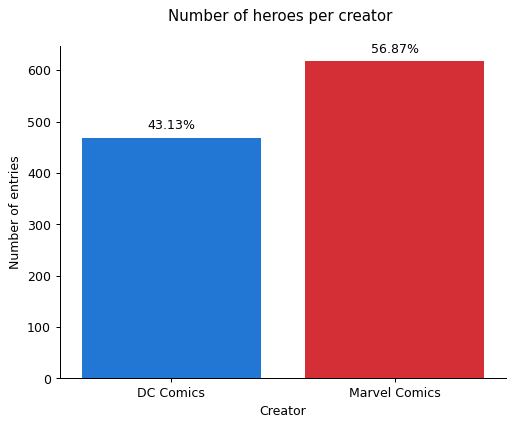

In [18]:
# check the balance of our classes to predict
print(heroes_cleaned["creator"].value_counts(),
      "\n\n"
      )

# plot the counts for visual overview

plt.figure(dpi=90)
plt.title("Number of heroes per creator \n")

ax = sns.countplot(data=heroes_cleaned,
                   x="creator",
                   palette=colours,
                   order=order
                   );
ax.set_xlabel("Creator")
ax.set_ylabel("Number of entries")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# annotate plots with relative frequencies

# the patches represent a visual shape in the plot (in this case, rectangles, or bars, if you will)
# we position the annotation by calculating the top (y-coordinate) of current patch 'p'
# we do this by retrieving the bounding box of current patch 'p', and access the y-coordinate of
# the top-right corner of the bounding box ([1,1])
# then, an annotation is added to the plot: it is a formatted percentage value of height 'y' of
# the current bar, relative to the total number of items in the dataset 'len(heroes_cleaned)'
# the values are set to display a total of two decimals '.2f'
# next, we concretely specify where the place the annotation in the plot
# we calculate the x and y coordinates for the annotation: here, it is placed at the horizontal
# centre of the bar 'p.get_x() + p.get_width() / 2.' and at the height of the bar 'p.get_height()'
# horizontal alignment 'ha' and vertical alignment 'va' are set to 'center', so the annotation will
# be centred both horizontally and vertically on the specified coordinates
# finally, the position of the text label with respect to the annotation point is determined 'textcoords="offset points"'
# the text label is positioned 10 points above the annotation point 'xytext=(0, 10)'

for p in ax.patches:
    y=p.get_bbox().get_points()[1,1]
    ax.annotate("{:.2f}%".format(100. * y / len(heroes_cleaned)),
                (p.get_x() + p.get_width() / 2.,
                p.get_height()),
                ha="center",
                va="center",
                xytext=(0, 10),
                textcoords="offset points"
                )

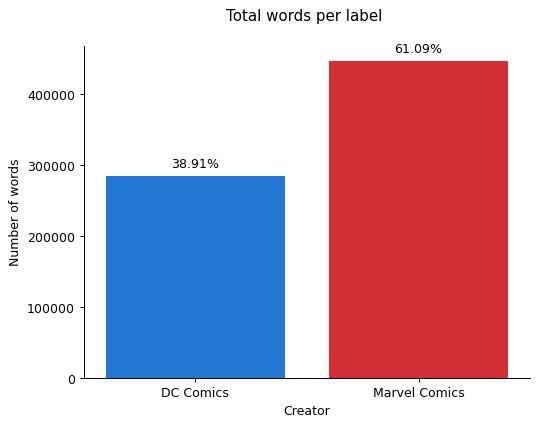

In [19]:
n_words_label = heroes_cleaned.groupby("creator")["length"].sum().reset_index()
n_words_total = heroes_cleaned["length"].sum()

plt.figure(dpi=90)
plt.title("Total words per label \n")

ax = sns.barplot(data=n_words_label,
                x="creator",
                y="length",
                palette=colours,
                order=order
                );
ax.set_xlabel("Creator")
ax.set_ylabel("Number of words")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

for p in ax.patches:
    y=p.get_bbox().get_points()[1,1]
    ax.annotate("{:.2f}%".format(100. * y / n_words_total),
                (p.get_x() + p.get_width() / 2.,
                p.get_height()),
                ha="center",
                va="center",
                xytext=(0, 10),
                textcoords="offset points"
                )

Text(0, 0.5, 'Creator')

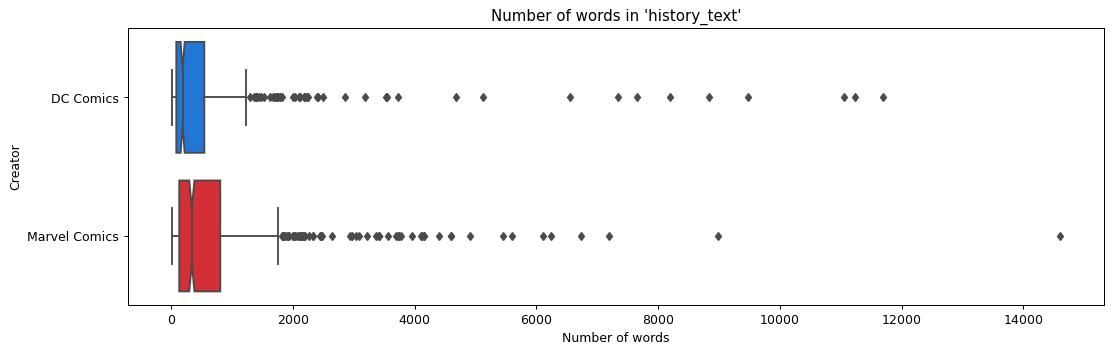

In [20]:
plt.figure(figsize=(14,4),dpi=90)
plt.title("Number of words in 'history_text'")

ax = sns.boxplot(data=heroes_cleaned,
                notch=True,
                x="length",
                y="creator",
                palette=colours,
                order=order
                )
ax.set_xlabel("Number of words")
ax.set_ylabel("Creator")

Text(0, 0.5, "'history_text' count")

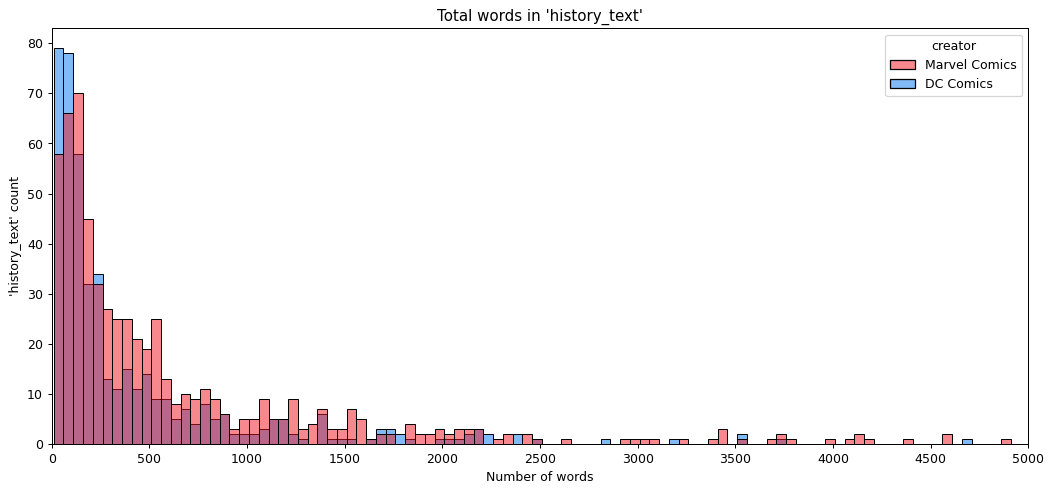

In [21]:
# I want to cover 50 units/words for each bin in the histogram
# considering the maximum number of words in the data points is 14,598,
# I will divide 14,598 by 50 and round the result (which would
# amount to 291)
# this way, the bins align nicely with the ticks

bin_width = 50
num_bins = max_n_words // bin_width
xtick_positions = [0,
                   500,
                   1000,
                   1500,
                   2000,
                   2500,
                   3000,
                   3500,
                   4000,
                   4500,
                   5000]
xtick_labels = ["0",
                "500",
                "1000",
                "1500",
                "2000",
                "2500",
                "3000",
                "3500",
                "4000",
                "4500",
                "5000"]

plt.figure(figsize=(14,6),dpi=90)
plt.xlim(0,5000)
plt.title("Total words in 'history_text'")
plt.xticks(xtick_positions,
           xtick_labels)

ax = sns.histplot(data=heroes_cleaned,
                  x="length",
                  bins=num_bins,
                  binwidth=50,
                  hue="creator",
                  palette=colours,
                  )
ax.set_xlabel("Number of words")
ax.set_ylabel("'history_text' count")

In [22]:
# finally, let's check the vocabulary size of the of the 'history_text' column,
# so we can get an estimation of the true size of our data and what it means
# for the models we will run

# we will use the .extend() method to concatenate and accumulate all the words from
# the different data points in the 'vocabulary' list
# by casting this list as a set 'unique_words', all duplicates of each word will be pruned
# because the set data structure stores only unique elements
# by calling the length function on this set 'unique_word_count', we can extract the exact vocabulary
# size of the dataset

def vocab_size(dataframe: pd.DataFrame, column_name: str) -> str:
    """
    Calculate the number of unique words in a dataframe column.

    Arguments:
        dataframe (pd.DataFrame): the dataframe containing the data.
        column_name (str): the name of the column from which you want
            to calculate the vocabulary size.
    Returns:
        str: the number of unique words in the column's vocabulary,
        string formatted for readability.
    """
    vocabulary = []
    dataframe[column_name].apply(lambda x: vocabulary.extend(x.split()))

    unique_words = set(vocabulary)
    unique_word_count = len(unique_words)

    return f"Vocabulary size = {unique_word_count} words."

In [23]:
# check if function works

vocab_size(heroes_cleaned, "history_text")

'Vocabulary size = 54210 words.'

**Some considerations:**
* With little over 1,000 relevant data points, we have a small dataset. Combined with the high-dimensionality of our feature space with a vocabulary of 54,210 unique words, we are at a high risk of overfitting the data. It is therefore desirable to limit the vocabulary so that the classifiers will be able to learn patterns from the data and generalise better. We can, however, nevertheless expect particular trouble when we are going to use complex models, i.e. deep learning models.
* The majority of data points contain less than 500 words. There are a lot of outliers from both labels with impressive counts going well over 10,000 words. It begs the question whether such large texts are useful for the models; do we end up just using electricity by incorporating such elongated epistels in our classifiers?
* One way to reduce vocabulary size is through lemmatisation. However, for this particular task, it might be necessary to preserve some of the words to allow the classifiers to differentiate between the labels: the example of X-Men comes to mind, which, when token- and lemmatised, will be split in the words 'x' and 'man'. The plural form 'men' is typical for Marvel heroes, as DC Comics has, as far as I can recall, no collective of heroes containing the word 'men'. Moreover, the X-Men are highly central characters in the Marvel universe, to the point of having significance for peripheral hero characters, so by lemmatising it, we might lose an important anchor point for the classifier to differentiate upon.
* To expand upon differentiating vocabulary, another challenge presents itself in the fact that both Marvel and DC creators work with the idea of a multiverse, meaning that both creators use 'Earth ##' to refer to a particular version of our planet in a particular universe. The recurrence of earth under both creators might confuse the algorithm.

### 2 Preprocessing

In [25]:
# imports for preprocessing
import re
import spacy
import sklearn
from sklearn.preprocessing import LabelEncoder

# load the SpaCy model
nlp = spacy.load("en_core_web_sm")

In [26]:
# there appear to be gremlins (replacement characters �) in the dataset
# unfortunately they are integral to the source of the data, i.e.
# they already were present in the web texts that were scraped for this dataset
# so changing the unicode to UTF-8 upon opening the dataset will not solve this

# let's hunt them down to eliminate as many as possible
# and while we're at it, let's hunt down all characters that don't exist in the
# Latin vocabulary

def find_gremlins(dataframe: pd.DataFrame, col_name: str) -> pd.DataFrame:
    """
    Search a dataframe column with string data to find characters that do not
    exist in the Latin vocabulary. The function then loops over the text,
    splitting the words, retrieving the words containing offending characters,
    and finally creates a dataframe with the offending word in the middle "hit"
    column, preceded by a column "start" containing two context words and followed by
    a column "end" containing three context words.

    Arguments:
        dataframe (pd.DataFrame): the dataframe you want to pass through this
            function.
        col_name (str): the name of the column within the dataframe you want
            to analyse.
    
    Returns:
        dataframe (pd.DataFrame): a dataframe with three columns: start, hit, end.
    """
    col_data = dataframe[col_name].astype(str)
    
    gremlin = r"[^\x00-\x7F]+"
    
    matches = []
    for text in col_data:
        words = text.split()
        # I first thought about putting the "if re.search(gremlin, word)" in a
        # previous line to simplify the list comprehension
        # doing so will result in an out-of-bound error
        words_with_gremlins = [word for word in words if re.search(gremlin, word)]
        for word in words_with_gremlins:
            index = words.index(word)
            start = " ".join(words[max(0, index -2):index])
            end = " ".join(words[index + 1:min(len(words), index + 4)])
            #context = " ".join(words[start:end])
            if (start, word, end) not in matches:
                matches.append((start, word, end))
    
    df = pd.DataFrame(matches, columns=["start", "index", "end"])
    return df
    # Return the list of matched words
    return matches

In [27]:
# check if the function works

gremlins = find_gremlins(heroes_cleaned, "history_text")

# save the dataframe to hard drive

gremlins.to_csv("data/gremlins.csv",
                   index=False)

In [28]:
# there are several ways to deal with the "X-Men" and "Earth-616"-problem
# one such way is declaring a list containing exceptions of words you don't want to
# tokenise and incorporate it with an "if token in list: continue" statement
# while looping over the tokens in a customised tokenisation function
# this is not practical because this requires to manually look up all the
# nouns in the profile texts that are hyphened (e.g. "Spider-Man", "Earth-616")

# a more feasible alternative is writing a function with a Regex pattern that
# looks up words split by hyphens, and remove the hyphens
# thus, the noun "XMen" or "xmen" (tokenised) is created
# and it can no longer be lemmatised in to "x" and "man"

def hero_cleaner(text: str) -> str:
    """
    Remove the hyphen or whitespace between "word" and "M/man" or "word" and "M/men",
    as well as words followed by digits, such as "Earth-616".
    Examples:
        -   "Spider-Man" becomes "SpiderMan"
        -   "X-Men" becomes "XMen"
        -   "Super-Girl" becomes "SuperGirl"
        -   "Earth-616" becomes "Earth616"
    Furthermore, superfluous whitespaces are removed (i.e. trailing whitespaces,
    and double whitespaces (or more) between words).
    
    Arguments:
        text (str): the input text to be processed.
    
    Returns:
        str: the text with the hyphenation and whitespace removed.
    """
    # start with removing trailing white spaces
    text = text.strip()

    #destroy gremlins:
    text = text.replace("Fa�ade", "Façade")
    text = text.replace("�doom", "doom")
    text = text.replace("Bl�dhaven", "Blüdhaven")
    text = text.replace("fianc�", "fiancé")
    text = text.replace("�Kick�", "Kick")
    text = text.replace("Sinestro�", "Sinestro ")
    text = text.replace("difficulty�", "difficulty ")
    text = text.replace("himself�", "himself ")
    text = text.replace(" � ", ": ")
    text = text.replace("love�Galactus", "love: Galactus")
    text = text.replace("S�o Paulo", "São Paulo")
    text = text.replace("Aelkh�nd", "Aelkhünd")
    text = text.replace("Ana�s Arcane", "Anaïs Arcane")
    text = text.replace("Tef�", "Tefé")
    text = text.replace("Valkyrie���s", "Valkyrie's")
    text = text.replace("Norriss���s", "Norriss'")
    text = text.replace("Brunnhilde���s", "Brunnhilde's")
    text = text.replace("Defenders���", "Defender's")
    text = text.replace("Interloper���s", "Interloper's")
    text = text.replace("�ǣmortal instruments���", "mortal instruments")
    text = text.replace("prot�g�", "protégé")
    text = text.replace("cr�che","crèche")
    text = text.replace("Jess�n", "Jessán")
    text = text.replace("�Hellverine�", "Hellverine")
    text = text.replace("�", "'")

    # destroy tokens flagged by the function as non-Latin
    # (also fix a couple of misspelled names along the way)
    text = text.replace("·", "")
    text = text.replace("’", "'")
    text = text.replace('“', '"')
    text = text.replace('”', '"')
    text = text.replace("–", "-")
    text = text.replace("—", "-")
    text = text.replace('Dr.MargaretAlexandra“Peggy”', 'Dr. Margaret Alexandra "Peggy"')
    text = text.replace("ğ", "g")
    text = text.replace("Matsu’o", "Matsuo")
    text = text.replace("…", ", ")
    text = text.replace("©", "")
    text = text.replace("駄犬,", "")
    text = text.replace("Arabic: الساحر;", "")
    text = text.replace("Arabic: رأس  ", "")
    text = text.replace("الغول‎;", "")
    text = text.replace("Arabic: نيسا", "")
    text = text.replace("رعتكو‎)", "")
    text = text.replace("الغول", "")
    text = text.replace("تاليا", "")
    text = text.replace("al-Ġūl;", "al-Ghul")
    text = text.replace("al Ghul", "al-Ghul")
    text = text.replace("Arabic: سراب; for ", "")
    text = text.replace("ís", "'s")
    text = text.replace("ít", "'t")
    text = text.replace("Vessí", "Vess'")
    text = text.replace("FaÁade", "Façade")
    text = text.replace("駄犬,", "")
    text = text.replace("(Russian: Ланья Сергеевна Петровна (Крылова))", "")
    text = text.replace("(Russian: Тёмная Звезда)", "")
    text = text.replace("Θ", "O")
    text = text.replace("Mathew merdoc’s", "Matthew Murdoc")
    text = text.replace("ō", "o")
    text = text.replace("ǣmortal", "mortal")
    text = text.replace("Avengers's", "Avengers'")

    text = re.sub(r"-(?=[Bb]oy\b|[Gg]irl\b|[Mm]an\b|[Mm]en\b|[Ww]oman\b|[Ww]omen\b|\d)", "", text)
    # Regex: match the "-" character literally, followed by positive lookahead,
    # matching with the words "B/boy", "G/girl", "M/man", "M/men", "W/woman", "W/women",
    # or a digit
    # the Regex expression does not account for whitespaces between superhero names,
    # such as "spider man", because the brute-force nature of this Regex will screw around with
    # patterns such as "many men" and ruin sentences like that
    text = re.sub(r"\b\s{2,}\b", " ", text)
    # Regex: find more than 2 subsequent whitespaces if they occur between words

    return text

In [29]:
# test the function

test_sents = "     The X-Men are a group   of mutants. Spider-Man is a Marvel hero. They come from Earth-616. \
Batman and Superman are DC-heroes. I don't know which universe Astro-Boy belongs to. \
Who is Hydro-Man?    "

output = hero_cleaner(test_sents)
output

"The XMen are a group of mutants. SpiderMan is a Marvel hero. They come from Earth616. Batman and Superman are DC-heroes. I don't know which universe AstroBoy belongs to. Who is HydroMan?"

#### 2.1 Breaking up the dataframe

Since I want to use a BERT model down the line, and given that BERT models cannot handle more than 512 tokens, I came up with the solution of increasing the size of the dataframe by breaking up all data points containing more than 512 words into different parts, as a way of performing data augmentation to deal with the possibility of overfitting. And yes, while it is true that BERT models have a native argument to do this chunking, The LSTM network will also need to be fed chunks of data of limited size. Overall, applying the same data preparation methods for all different classifiers will result in the fairest comparison.

In [30]:
def text_chunker(text: str, max_word_length: int) -> List[str]:
    """
    Break up the dataframe texts in multiple chunks, stored in a list.
    The chunks are divided on a sentence level. If a sentence is incomplete
    when it reaches the max_word_length boundary, it will carry over to the
    subsequent chunk in its entirety.
    
    Arguments:
        text (str): the input text to be divided into chunks.
        max_word_length (int): the number of maximum word each chunk
            is allowed to have.
    
    Returns:
        List[str]: a list of chunks
    """
    chunks = []

    # split text into sentences, assuming they end with a period and a whitespace
    sentences = re.split(r"(?<=\.) ", text)
    current_chunk = ""

    # I want to keep sentence integrity intact
    # if a sentence cannot complete before the max word boundary is reached,
    # it will carry over to the next chunk in its entirety   
    for sentence in sentences:
        sentence_words = sentence.split()

        if len(current_chunk.split()) + len(sentence_words) <= max_word_length:
            current_chunk += sentence + " "
        else:
            chunks.append(current_chunk.strip())
            current_chunk = sentence + " "
    if current_chunk:
        chunks.append(current_chunk.strip())
    
    return chunks

In [31]:
# create a new dataframe based on splitting the "history_text" into chunks

chunk_list = []
labels_list = []

for index, row in heroes_cleaned.iterrows():
    history_text = row["history_text"]
    creator = row["creator"]

    subsequences = text_chunker(history_text, max_word_length=448)
    labels = [creator] * len(subsequences)
    chunk_list.extend(subsequences)
    labels_list.extend(labels)

heroes_augmented = pd.DataFrame({"history_text": chunk_list,
                                "creator": labels_list,
                                "length": [len(text.split()) for text in chunk_list] 
                                })

In [32]:
heroes_augmented.sort_values("length", ascending=True)

,history_text,creator,length
368,The resulting energy blast destroyed Black Lan...,DC Comics,8
332,A.S. Scarlet is professor of English literatur...,DC Comics,10
979,Infinity Man is the combined form of the Forev...,DC Comics,10
2037,"Fusion of five Gods: Highfather, Ares, Zeus, J...",DC Comics,10
1443,Nightshade is a superhero with the ability to ...,DC Comics,10
...,...,...,...
539,A chance encounter with Weasel later restored ...,Marvel Comics,448
1906,"Storm was initially unsure about her new role,...",Marvel Comics,448
1059,"John managed to run out of plain sight, and in...",DC Comics,448
1791,She was placed in a containment unit to ensure...,Marvel Comics,448


In [33]:
heroes_augmented.loc[368, "history_text"]

'The resulting energy blast destroyed Black Lantern Bushido.'

#### 2.2 Checking class balance

Marvel Comics    1370
DC Comics         947
Name: creator, dtype: int64 




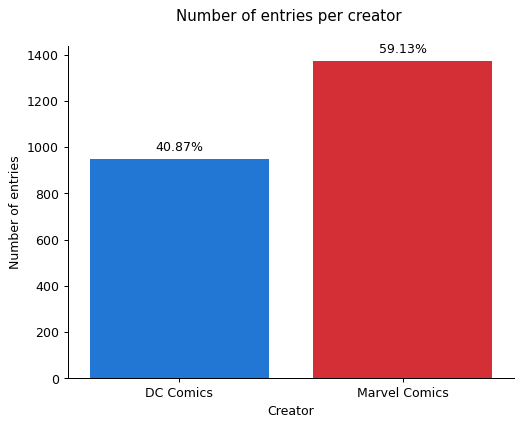

In [34]:
# check the balance of our classes to predict
print(heroes_augmented["creator"].value_counts(),
      "\n\n"
      )

# plot the counts for visual overview

plt.figure(dpi=90)
plt.title("Number of entries per creator \n")

ax = sns.countplot(data=heroes_augmented,
                   x="creator",
                   palette=colours,
                   order=order
                   );
ax.set_xlabel("Creator")
ax.set_ylabel("Number of entries")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# annotate plots with relative frequencies

for p in ax.patches:
    y=p.get_bbox().get_points()[1,1]
    ax.annotate("{:.2f}%".format(100. * y / len(heroes_augmented)),
                (p.get_x() + p.get_width() / 2.,
                p.get_height()),
                ha="center",
                va="center",
                xytext=(0, 10),
                textcoords="offset points"
                )

Text(0, 0.5, 'Creator')

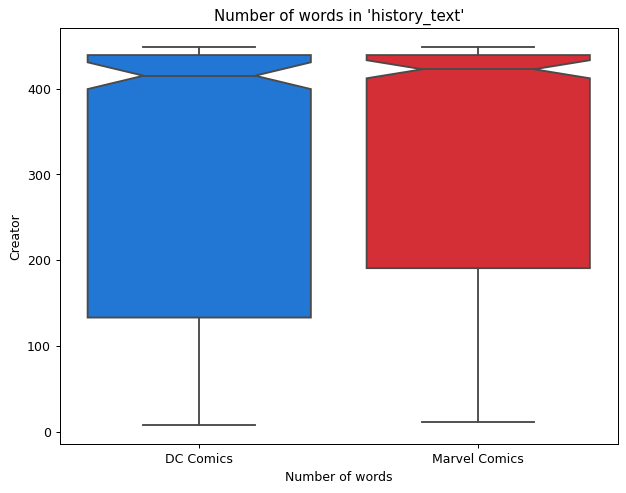

In [35]:
plt.figure(figsize=(8,6),dpi=90)
plt.title("Number of words in 'history_text'")

ax = sns.boxplot(data=heroes_augmented,
                notch=True,
                x="creator",
                y="length",
                palette=colours,
                order=order
                )
ax.set_xlabel("Number of words")
ax.set_ylabel("Creator")

#### 2.3 Preprocessing

In [36]:
def preprocess_text(text: str, remove_stopwords=True, lemmatize=True) -> str:
    """
    Tokenise and lemmatise a text.

    Arguments:
        text (str): the input text to tokenise and lemmatise.
        remove_stopwords (bool): whether stop words should be removed.
            Defaults to True.
        lemmatize (bool): whether to lemmatise the text. Defaults to True.
    
    Returns:
        str: if remove_stopwords=True and lemmatize=True: lemmatized tokens, stop words removed.
             if remove_stopwords=True and lemmatize=False: lowercased tokens, stop words removed.
             if remove_stopwords=False and lemmatize=False: lowercased tokens, stop words, preserverd.
    """
    tokens = nlp(text.lower())
    if lemmatize and remove_stopwords:
        prep_text = " ".join([token.lemma_ for token in tokens if not token.is_stop])
    elif not lemmatize and remove_stopwords:
        prep_text = " ".join([token.text for token in tokens if not token.is_stop])
    else:
        prep_text = " ".join([token.text for token in tokens])
    

    return prep_text

In [37]:
heroes_augmented["hist_text_classic"] = heroes_augmented["history_text"].apply(hero_cleaner)
heroes_augmented["hist_text_classic"] = heroes_augmented["hist_text_classic"].apply(preprocess_text)
heroes_augmented["hist_text_bert"] = heroes_augmented["history_text"].apply(hero_cleaner)

# we will not run a DistilBERT tokenizer in this environment -- that comes later

In [38]:
print(vocab_size(heroes_augmented, "hist_text_classic"))
heroes_augmented.sample(10)

Vocabulary size = 19989 words.


,history_text,creator,length,hist_text_classic,hist_text_bert
1551,"Simon Morrison (April 21, 1986–May 17, 2017), ...",DC Comics,224,"simon morrison ( april 21 , 1986 - 17 , 2017 )...","Simon Morrison (April 21, 1986-May 17, 2017), ..."
2222,Patch accompanied Xi'an Coy Manh to the airpor...,Marvel Comics,435,patch accompany xi'an coy manh airport witness...,Patch accompanied Xi'an Coy Manh to the airpor...
1705,"While pursuing Pyg, he overlooks an earlier pr...",DC Comics,436,"pursue pyg , overlook early promise sasha ( pr...","While pursuing Pyg, he overlooks an earlier pr..."
827,"The realm of the Great Darkness, an expanse of...",DC Comics,51,"realm great darkness , expanse complete utter ...","The realm of the Great Darkness, an expanse of..."
1825,Sinestro recruited these two into his ranks an...,DC Comics,431,sinestro recruit rank sinestro parallax herald...,Sinestro recruited these two into his ranks an...
275,The Black Cat's father was a world renowned ca...,Marvel Comics,439,"black cat father world renowned cat burglar , ...",The Black Cat's father was a world renowned ca...
2271,"Shortly before Wong's tenth birthday, Hamir br...",Marvel Comics,441,"shortly wong tenth birthday , hamir bring youn...","Shortly before Wong's tenth birthday, Hamir br..."
2096,Thomas Elliot was also the villain known as Hu...,DC Comics,404,"thomas elliot villain know hush , hope manipul...",Thomas Elliot was also the villain known as Hu...
527,"Likewise, Alison could not hold down a gig to ...",Marvel Comics,445,"likewise , alison hold gig save soul , inconve...","Likewise, Alison could not hold down a gig to ..."
215,"After that, she was ready to become Batwoman ...",DC Comics,414,", ready batwoman kate eventually stumble organ...","After that, she was ready to become Batwoman K..."


In [39]:
le = LabelEncoder()
le.fit(heroes_augmented["creator"])
print(le.classes_)
heroes_augmented["label"] = le.transform(heroes_augmented["creator"])

['DC Comics' 'Marvel Comics']


In [40]:
heroes_augmented = heroes_augmented[["history_text",
                                     "length",
                                     "hist_text_classic",
                                     "hist_text_bert",
                                     "creator",
                                     "label"]]

heroes_augmented.head(1)

,history_text,length,hist_text_classic,hist_text_bert,creator,label
0,"Delroy Garrett, Jr. grew up to become a track ...",84,"delroy garrett , jr . grow track star compete ...","Delroy Garrett, Jr. grew up to become a track ...",Marvel Comics,1


In [41]:
# save the processed dataframe to hard drive

heroes_augmented.to_csv("data/heroes_preprocessed.csv",
                   index=False)

### 3 Final descriptive analysis

Now that we have function to remove stop words, we can check which are the most and least occuring words per label in the dataset.

In [42]:
heroes_augmented["hist_analyse"] = heroes_augmented["history_text"].apply(hero_cleaner)
heroes_augmented["hist_analyse"] = heroes_augmented["hist_analyse"].apply(preprocess_text,
                                                                          remove_stopwords=True,
                                                                          lemmatize=False)

In [43]:
heroes_augmented.head(5)

,history_text,length,hist_text_classic,hist_text_bert,creator,label,hist_analyse
0,"Delroy Garrett, Jr. grew up to become a track ...",84,"delroy garrett , jr . grow track star compete ...","Delroy Garrett, Jr. grew up to become a track ...",Marvel Comics,1,"delroy garrett , jr . grew track star competed..."
1,He was one of the many prisoners of Indian Hil...,443,prisoner indian hill transfer facility upstate...,He was one of the many prisoners of Indian Hil...,DC Comics,0,prisoners indian hill transferred facility ups...
2,"As Selina goes into the bar, Subject 514A is t...",232,"selina go bar , subject 514a tell . selina fin...","As Selina goes into the bar, Subject 514A is t...",DC Comics,0,"selina goes bar , subject 514a told . selina f..."
3,"Richard ""Rick"" Jones was orphaned at a young a...",441,"richard "" rick "" jones orphan young age , expe...","Richard ""Rick"" Jones was orphaned at a young a...",Marvel Comics,1,"richard "" rick "" jones orphaned young age , ex..."
4,Using the Negative Zone portal in the Baxter B...,442,negative zone portal baxter building remove li...,Using the Negative Zone portal in the Baxter B...,Marvel Comics,1,negative zone portal baxter building remove li...


In [44]:
dc_words = heroes_augmented.loc[heroes_augmented["creator"] == "DC Comics"]["hist_analyse"]
marvel_words = heroes_augmented.loc[heroes_augmented["creator"] == "Marvel Comics"]["hist_analyse"]

dc_tokens = [re.sub(r"[^\w\s]", "", word) for text in dc_words for word in text.split()]
dc_tokens = [word for word in dc_tokens if word]

marvel_tokens = [re.sub(r"[^\w\s]", "", word) for text in marvel_words for word in text.split()]
marvel_tokens = [word for word in marvel_tokens if word]

dc_counts = Counter(dc_tokens)
marvel_counts = Counter(marvel_tokens)

In [45]:
dc_counts.most_common(20)

[('batman', 883),
 ('time', 819),
 ('superman', 710),
 ('new', 680),
 ('robin', 562),
 ('city', 554),
 ('later', 550),
 ('flash', 514),
 ('earth', 501),
 ('tim', 473),
 ('black', 461),
 ('wally', 452),
 ('barry', 450),
 ('life', 429),
 ('man', 420),
 ('death', 389),
 ('father', 378),
 ('team', 377),
 ('help', 371),
 ('power', 364)]

In [46]:
marvel_counts.most_common(20)

[('new', 1411),
 ('xmen', 1222),
 ('time', 1198),
 ('later', 1121),
 ('team', 1011),
 ('earth', 880),
 ('hulk', 876),
 ('powers', 836),
 ('mutant', 825),
 ('power', 790),
 ('man', 786),
 ('avengers', 774),
 ('x', 760),
 ('life', 679),
 ('battle', 651),
 ('returned', 634),
 ('spiderman', 626),
 ('mutants', 590),
 ('found', 585),
 ('wolverine', 570)]

In [47]:
dc_counts.most_common()[:-20-1:-1]

[('inflicted', 1),
 ('unconscious3', 1),
 ('atlanta', 1),
 ('corps2', 1),
 ('up1', 1),
 ('rome', 1),
 ('sacking', 1),
 ('mistreatment', 1),
 ('miscarried', 1),
 ('reminiscent', 1),
 ('throttled', 1),
 ('aggrandizing', 1),
 ('dispatch', 1),
 ('battlefront', 1),
 ('spiriting', 1),
 ('cautiously', 1),
 ('terminated', 1),
 ('fruitlessly', 1),
 ('sanctum', 1),
 ('magi', 1)]

In [48]:
marvel_counts.most_common()[:-20-1:-1]

[('misjudged', 1),
 ('nevermind', 1),
 ('submerging', 1),
 ('recreation', 1),
 ('voltage', 1),
 ('polarity', 1),
 ('cables', 1),
 ('adequately', 1),
 ('reemergence', 1),
 ('thunderstorm', 1),
 ('residue', 1),
 ('stratosphere', 1),
 ('graduates', 1),
 ('constituent', 1),
 ('crackle', 1),
 ('electrostatic', 1),
 ('edison', 1),
 ('amik', 1),
 ('kaisheks', 1),
 ('haan', 1)]